In [1]:
from monai.utils import first, set_determinism
from monai.transforms import (
    AddChanneld,
    EnsureChannelFirstd,
    Compose,
    LoadImaged,
    Orientationd,
    SaveImaged,
    RandAffined,
    Spacingd,
    Invertd,
    Resized,
    RandRotated,
    Rand3DElasticd,
    RandGaussianNoised,
    ShiftIntensityd,
    RandFlipd,
    RandAxisFlipd,
    RandAffined,
    ToTensord,
)

from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import SimpleITK as sitk
import numpy as np
from tqdm.notebook import tqdm, trange



In [2]:
data_dir = 'E:/Tanvir Mehedi/Nodule_Classification/Data/pos_cube_nii/'

train_images = sorted(
    glob.glob(os.path.join(data_dir, "*.nii")))



data_dicts = [
    {"image": image_name}
    for image_name in zip(train_images)
]

train_files = data_dicts[:]

print('Train files : ', len(train_files))

Train files :  691


In [3]:
# train_files


In [4]:
set_determinism(seed = 0)


In [5]:
train_transforms = Compose(
    [
        LoadImaged(keys = ["image"]),
        EnsureChannelFirstd(keys = ["image"]),
        Orientationd(keys = ["image"], axcodes = 'SPL'),

        RandAxisFlipd(keys = ['image'], prob = 0.25),
        
        RandRotated(keys = ["image"], range_x = np.pi/6, range_y = np.pi/6, range_z = np.pi/6, prob = 0.25, 
                    keep_size = True, mode = ["bilinear"],),
        
        RandGaussianNoised(keys = ['image'], prob = 0.25, mean = 0, std = 0.02),
        
        Rand3DElasticd(keys = ["image"], sigma_range = [5,7], magnitude_range = [0,1], 
                       prob = 0.25, mode = ["bilinear"]),
        
        RandAffined(keys = ["image"], prob = 0.25, translate_range = 5, mode = 'bilinear', 
                    padding_mode = 'zeros'),
        
        ToTensord(keys=["image"]),
    ]
)


In [6]:
# Model Parameters

batch_size = 1
num_workers = 2
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [7]:
# Train

train_ds = Dataset(data = train_files, transform = train_transforms)
train_loader = DataLoader(train_ds, batch_size = batch_size, shuffle = False, num_workers = num_workers)


In [8]:
for itera_no, data in enumerate(train_loader) :

    print(itera_no)

    image = data['image']
    print(image.shape)

    image = image.detach().cpu().numpy()
    image = image[0,0]
    break

print(np.min(image))
print(np.max(image))

0
torch.Size([1, 1, 32, 32, 32])
0.0
0.6499068


(32, 32, 32)
image 0


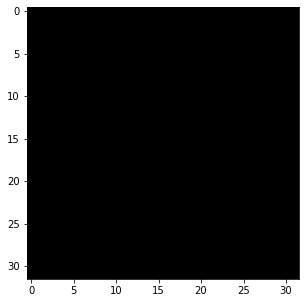

image 1


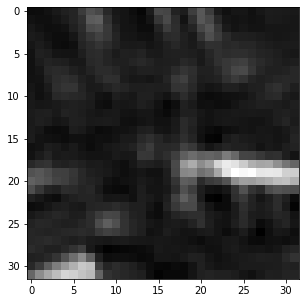

image 2


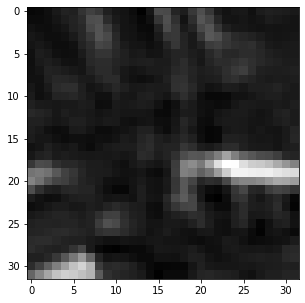

image 3


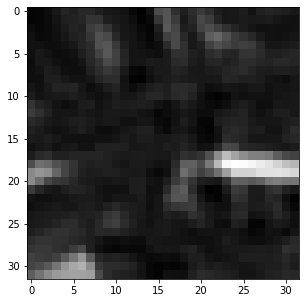

image 4


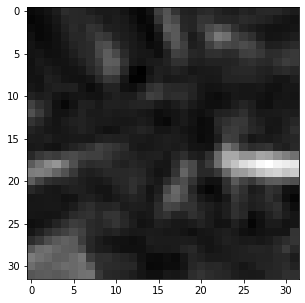

image 5


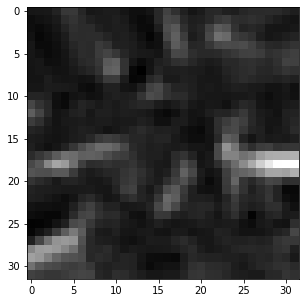

image 6


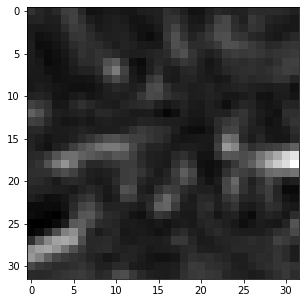

image 7


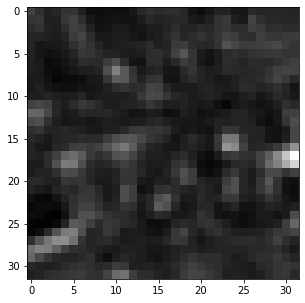

image 8


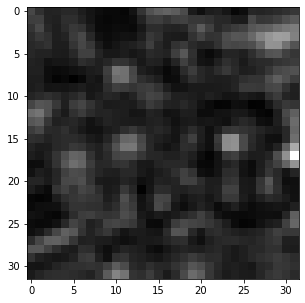

image 9


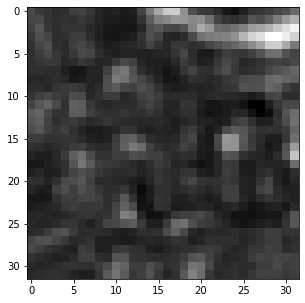

image 10


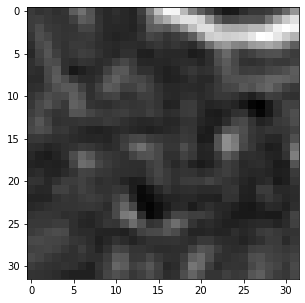

image 11


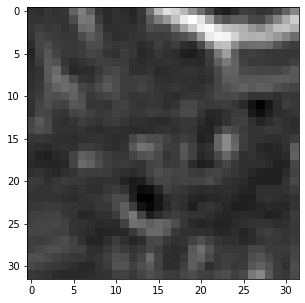

image 12


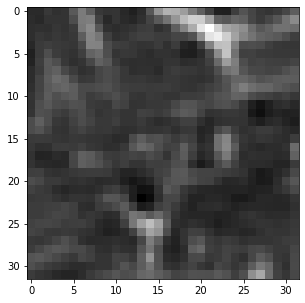

image 13


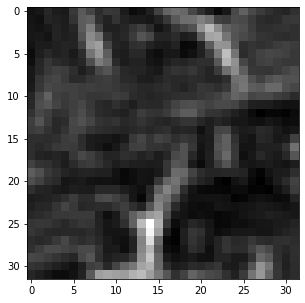

image 14


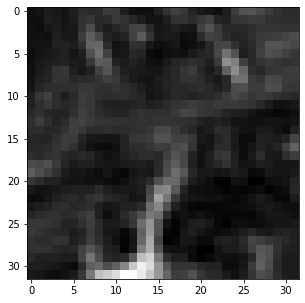

image 15


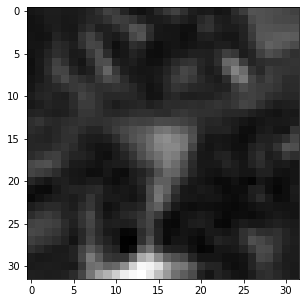

image 16


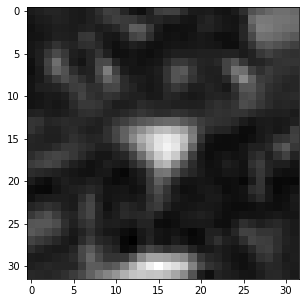

image 17


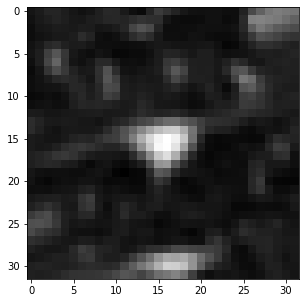

image 18


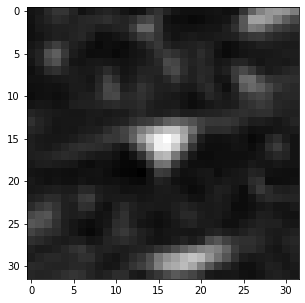

image 19


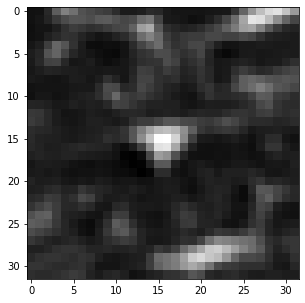

image 20


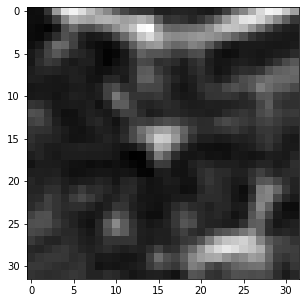

image 21


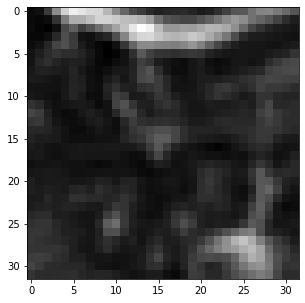

image 22


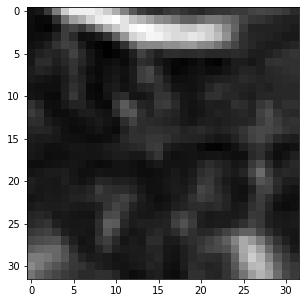

image 23


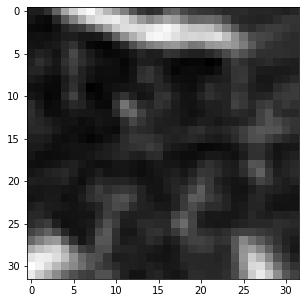

image 24


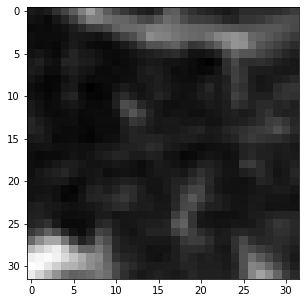

image 25


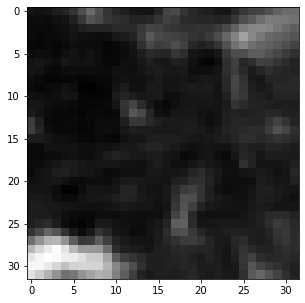

image 26


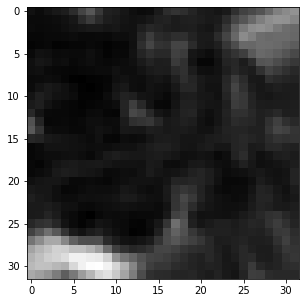

image 27


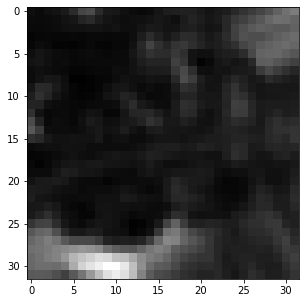

image 28


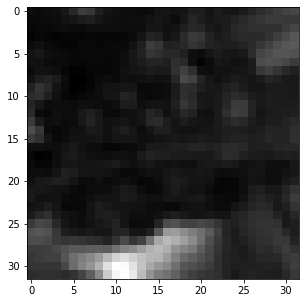

image 29


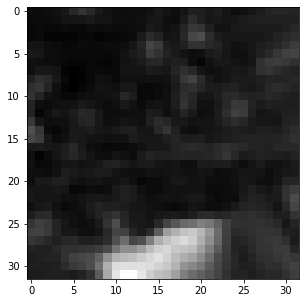

image 30


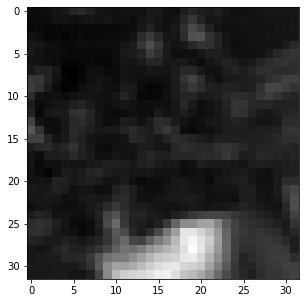

image 31


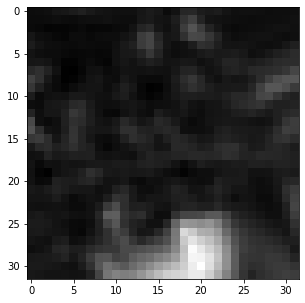

In [9]:
imgs = image

print(imgs.shape)

for i in range(len(imgs)):
    
    print("image %d" % i)
    plt.figure(figsize=(5,5))
    plt.imshow(imgs[i],cmap='gray')
    plt.show()
    

In [10]:
output_trans_pos_path = 'E:/Tanvir Mehedi/Nodule_Classification/Data/all_trans/'


In [11]:
for i in tqdm(range(20)):

    for itera_no, data in enumerate(train_loader) :

        print(itera_no)

        image = data['image']
        print(image.shape)

        image = image.detach().cpu().numpy()
        image = image[0,0]

        seriesuid = train_files[itera_no]['image'][0].split('\\')[-1][:-4]

        np.save(output_trans_pos_path + seriesuid + '_trans_' + '%04d' %i + '.npy', image)


  0%|          | 0/20 [00:00<?, ?it/s]

0
torch.Size([1, 1, 32, 32, 32])
1
torch.Size([1, 1, 32, 32, 32])
2
torch.Size([1, 1, 32, 32, 32])
3
torch.Size([1, 1, 32, 32, 32])
4
torch.Size([1, 1, 32, 32, 32])
5
torch.Size([1, 1, 32, 32, 32])
6
torch.Size([1, 1, 32, 32, 32])
7
torch.Size([1, 1, 32, 32, 32])
8
torch.Size([1, 1, 32, 32, 32])
9
torch.Size([1, 1, 32, 32, 32])
10
torch.Size([1, 1, 32, 32, 32])
11
torch.Size([1, 1, 32, 32, 32])
12
torch.Size([1, 1, 32, 32, 32])
13
torch.Size([1, 1, 32, 32, 32])
14
torch.Size([1, 1, 32, 32, 32])
15
torch.Size([1, 1, 32, 32, 32])
16
torch.Size([1, 1, 32, 32, 32])
17
torch.Size([1, 1, 32, 32, 32])
18
torch.Size([1, 1, 32, 32, 32])
19
torch.Size([1, 1, 32, 32, 32])
20
torch.Size([1, 1, 32, 32, 32])
21
torch.Size([1, 1, 32, 32, 32])
22
torch.Size([1, 1, 32, 32, 32])
23
torch.Size([1, 1, 32, 32, 32])
24
torch.Size([1, 1, 32, 32, 32])
25
torch.Size([1, 1, 32, 32, 32])
26
torch.Size([1, 1, 32, 32, 32])
27
torch.Size([1, 1, 32, 32, 32])
28
torch.Size([1, 1, 32, 32, 32])
29
torch.Size([1, 1, 32,

245
torch.Size([1, 1, 32, 32, 32])
246
torch.Size([1, 1, 32, 32, 32])
247
torch.Size([1, 1, 32, 32, 32])
248
torch.Size([1, 1, 32, 32, 32])
249
torch.Size([1, 1, 32, 32, 32])
250
torch.Size([1, 1, 32, 32, 32])
251
torch.Size([1, 1, 32, 32, 32])
252
torch.Size([1, 1, 32, 32, 32])
253
torch.Size([1, 1, 32, 32, 32])
254
torch.Size([1, 1, 32, 32, 32])
255
torch.Size([1, 1, 32, 32, 32])
256
torch.Size([1, 1, 32, 32, 32])
257
torch.Size([1, 1, 32, 32, 32])
258
torch.Size([1, 1, 32, 32, 32])
259
torch.Size([1, 1, 32, 32, 32])
260
torch.Size([1, 1, 32, 32, 32])
261
torch.Size([1, 1, 32, 32, 32])
262
torch.Size([1, 1, 32, 32, 32])
263
torch.Size([1, 1, 32, 32, 32])
264
torch.Size([1, 1, 32, 32, 32])
265
torch.Size([1, 1, 32, 32, 32])
266
torch.Size([1, 1, 32, 32, 32])
267
torch.Size([1, 1, 32, 32, 32])
268
torch.Size([1, 1, 32, 32, 32])
269
torch.Size([1, 1, 32, 32, 32])
270
torch.Size([1, 1, 32, 32, 32])
271
torch.Size([1, 1, 32, 32, 32])
272
torch.Size([1, 1, 32, 32, 32])
273
torch.Size([1, 1

487
torch.Size([1, 1, 32, 32, 32])
488
torch.Size([1, 1, 32, 32, 32])
489
torch.Size([1, 1, 32, 32, 32])
490
torch.Size([1, 1, 32, 32, 32])
491
torch.Size([1, 1, 32, 32, 32])
492
torch.Size([1, 1, 32, 32, 32])
493
torch.Size([1, 1, 32, 32, 32])
494
torch.Size([1, 1, 32, 32, 32])
495
torch.Size([1, 1, 32, 32, 32])
496
torch.Size([1, 1, 32, 32, 32])
497
torch.Size([1, 1, 32, 32, 32])
498
torch.Size([1, 1, 32, 32, 32])
499
torch.Size([1, 1, 32, 32, 32])
500
torch.Size([1, 1, 32, 32, 32])
501
torch.Size([1, 1, 32, 32, 32])
502
torch.Size([1, 1, 32, 32, 32])
503
torch.Size([1, 1, 32, 32, 32])
504
torch.Size([1, 1, 32, 32, 32])
505
torch.Size([1, 1, 32, 32, 32])
506
torch.Size([1, 1, 32, 32, 32])
507
torch.Size([1, 1, 32, 32, 32])
508
torch.Size([1, 1, 32, 32, 32])
509
torch.Size([1, 1, 32, 32, 32])
510
torch.Size([1, 1, 32, 32, 32])
511
torch.Size([1, 1, 32, 32, 32])
512
torch.Size([1, 1, 32, 32, 32])
513
torch.Size([1, 1, 32, 32, 32])
514
torch.Size([1, 1, 32, 32, 32])
515
torch.Size([1, 1

47
torch.Size([1, 1, 32, 32, 32])
48
torch.Size([1, 1, 32, 32, 32])
49
torch.Size([1, 1, 32, 32, 32])
50
torch.Size([1, 1, 32, 32, 32])
51
torch.Size([1, 1, 32, 32, 32])
52
torch.Size([1, 1, 32, 32, 32])
53
torch.Size([1, 1, 32, 32, 32])
54
torch.Size([1, 1, 32, 32, 32])
55
torch.Size([1, 1, 32, 32, 32])
56
torch.Size([1, 1, 32, 32, 32])
57
torch.Size([1, 1, 32, 32, 32])
58
torch.Size([1, 1, 32, 32, 32])
59
torch.Size([1, 1, 32, 32, 32])
60
torch.Size([1, 1, 32, 32, 32])
61
torch.Size([1, 1, 32, 32, 32])
62
torch.Size([1, 1, 32, 32, 32])
63
torch.Size([1, 1, 32, 32, 32])
64
torch.Size([1, 1, 32, 32, 32])
65
torch.Size([1, 1, 32, 32, 32])
66
torch.Size([1, 1, 32, 32, 32])
67
torch.Size([1, 1, 32, 32, 32])
68
torch.Size([1, 1, 32, 32, 32])
69
torch.Size([1, 1, 32, 32, 32])
70
torch.Size([1, 1, 32, 32, 32])
71
torch.Size([1, 1, 32, 32, 32])
72
torch.Size([1, 1, 32, 32, 32])
73
torch.Size([1, 1, 32, 32, 32])
74
torch.Size([1, 1, 32, 32, 32])
75
torch.Size([1, 1, 32, 32, 32])
76
torch.Size(

291
torch.Size([1, 1, 32, 32, 32])
292
torch.Size([1, 1, 32, 32, 32])
293
torch.Size([1, 1, 32, 32, 32])
294
torch.Size([1, 1, 32, 32, 32])
295
torch.Size([1, 1, 32, 32, 32])
296
torch.Size([1, 1, 32, 32, 32])
297
torch.Size([1, 1, 32, 32, 32])
298
torch.Size([1, 1, 32, 32, 32])
299
torch.Size([1, 1, 32, 32, 32])
300
torch.Size([1, 1, 32, 32, 32])
301
torch.Size([1, 1, 32, 32, 32])
302
torch.Size([1, 1, 32, 32, 32])
303
torch.Size([1, 1, 32, 32, 32])
304
torch.Size([1, 1, 32, 32, 32])
305
torch.Size([1, 1, 32, 32, 32])
306
torch.Size([1, 1, 32, 32, 32])
307
torch.Size([1, 1, 32, 32, 32])
308
torch.Size([1, 1, 32, 32, 32])
309
torch.Size([1, 1, 32, 32, 32])
310
torch.Size([1, 1, 32, 32, 32])
311
torch.Size([1, 1, 32, 32, 32])
312
torch.Size([1, 1, 32, 32, 32])
313
torch.Size([1, 1, 32, 32, 32])
314
torch.Size([1, 1, 32, 32, 32])
315
torch.Size([1, 1, 32, 32, 32])
316
torch.Size([1, 1, 32, 32, 32])
317
torch.Size([1, 1, 32, 32, 32])
318
torch.Size([1, 1, 32, 32, 32])
319
torch.Size([1, 1

528
torch.Size([1, 1, 32, 32, 32])
529
torch.Size([1, 1, 32, 32, 32])
530
torch.Size([1, 1, 32, 32, 32])
531
torch.Size([1, 1, 32, 32, 32])
532
torch.Size([1, 1, 32, 32, 32])
533
torch.Size([1, 1, 32, 32, 32])
534
torch.Size([1, 1, 32, 32, 32])
535
torch.Size([1, 1, 32, 32, 32])
536
torch.Size([1, 1, 32, 32, 32])
537
torch.Size([1, 1, 32, 32, 32])
538
torch.Size([1, 1, 32, 32, 32])
539
torch.Size([1, 1, 32, 32, 32])
540
torch.Size([1, 1, 32, 32, 32])
541
torch.Size([1, 1, 32, 32, 32])
542
torch.Size([1, 1, 32, 32, 32])
543
torch.Size([1, 1, 32, 32, 32])
544
torch.Size([1, 1, 32, 32, 32])
545
torch.Size([1, 1, 32, 32, 32])
546
torch.Size([1, 1, 32, 32, 32])
547
torch.Size([1, 1, 32, 32, 32])
548
torch.Size([1, 1, 32, 32, 32])
549
torch.Size([1, 1, 32, 32, 32])
550
torch.Size([1, 1, 32, 32, 32])
551
torch.Size([1, 1, 32, 32, 32])
552
torch.Size([1, 1, 32, 32, 32])
553
torch.Size([1, 1, 32, 32, 32])
554
torch.Size([1, 1, 32, 32, 32])
555
torch.Size([1, 1, 32, 32, 32])
556
torch.Size([1, 1

77
torch.Size([1, 1, 32, 32, 32])
78
torch.Size([1, 1, 32, 32, 32])
79
torch.Size([1, 1, 32, 32, 32])
80
torch.Size([1, 1, 32, 32, 32])
81
torch.Size([1, 1, 32, 32, 32])
82
torch.Size([1, 1, 32, 32, 32])
83
torch.Size([1, 1, 32, 32, 32])
84
torch.Size([1, 1, 32, 32, 32])
85
torch.Size([1, 1, 32, 32, 32])
86
torch.Size([1, 1, 32, 32, 32])
87
torch.Size([1, 1, 32, 32, 32])
88
torch.Size([1, 1, 32, 32, 32])
89
torch.Size([1, 1, 32, 32, 32])
90
torch.Size([1, 1, 32, 32, 32])
91
torch.Size([1, 1, 32, 32, 32])
92
torch.Size([1, 1, 32, 32, 32])
93
torch.Size([1, 1, 32, 32, 32])
94
torch.Size([1, 1, 32, 32, 32])
95
torch.Size([1, 1, 32, 32, 32])
96
torch.Size([1, 1, 32, 32, 32])
97
torch.Size([1, 1, 32, 32, 32])
98
torch.Size([1, 1, 32, 32, 32])
99
torch.Size([1, 1, 32, 32, 32])
100
torch.Size([1, 1, 32, 32, 32])
101
torch.Size([1, 1, 32, 32, 32])
102
torch.Size([1, 1, 32, 32, 32])
103
torch.Size([1, 1, 32, 32, 32])
104
torch.Size([1, 1, 32, 32, 32])
105
torch.Size([1, 1, 32, 32, 32])
106
torc

318
torch.Size([1, 1, 32, 32, 32])
319
torch.Size([1, 1, 32, 32, 32])
320
torch.Size([1, 1, 32, 32, 32])
321
torch.Size([1, 1, 32, 32, 32])
322
torch.Size([1, 1, 32, 32, 32])
323
torch.Size([1, 1, 32, 32, 32])
324
torch.Size([1, 1, 32, 32, 32])
325
torch.Size([1, 1, 32, 32, 32])
326
torch.Size([1, 1, 32, 32, 32])
327
torch.Size([1, 1, 32, 32, 32])
328
torch.Size([1, 1, 32, 32, 32])
329
torch.Size([1, 1, 32, 32, 32])
330
torch.Size([1, 1, 32, 32, 32])
331
torch.Size([1, 1, 32, 32, 32])
332
torch.Size([1, 1, 32, 32, 32])
333
torch.Size([1, 1, 32, 32, 32])
334
torch.Size([1, 1, 32, 32, 32])
335
torch.Size([1, 1, 32, 32, 32])
336
torch.Size([1, 1, 32, 32, 32])
337
torch.Size([1, 1, 32, 32, 32])
338
torch.Size([1, 1, 32, 32, 32])
339
torch.Size([1, 1, 32, 32, 32])
340
torch.Size([1, 1, 32, 32, 32])
341
torch.Size([1, 1, 32, 32, 32])
342
torch.Size([1, 1, 32, 32, 32])
343
torch.Size([1, 1, 32, 32, 32])
344
torch.Size([1, 1, 32, 32, 32])
345
torch.Size([1, 1, 32, 32, 32])
346
torch.Size([1, 1

555
torch.Size([1, 1, 32, 32, 32])
556
torch.Size([1, 1, 32, 32, 32])
557
torch.Size([1, 1, 32, 32, 32])
558
torch.Size([1, 1, 32, 32, 32])
559
torch.Size([1, 1, 32, 32, 32])
560
torch.Size([1, 1, 32, 32, 32])
561
torch.Size([1, 1, 32, 32, 32])
562
torch.Size([1, 1, 32, 32, 32])
563
torch.Size([1, 1, 32, 32, 32])
564
torch.Size([1, 1, 32, 32, 32])
565
torch.Size([1, 1, 32, 32, 32])
566
torch.Size([1, 1, 32, 32, 32])
567
torch.Size([1, 1, 32, 32, 32])
568
torch.Size([1, 1, 32, 32, 32])
569
torch.Size([1, 1, 32, 32, 32])
570
torch.Size([1, 1, 32, 32, 32])
571
torch.Size([1, 1, 32, 32, 32])
572
torch.Size([1, 1, 32, 32, 32])
573
torch.Size([1, 1, 32, 32, 32])
574
torch.Size([1, 1, 32, 32, 32])
575
torch.Size([1, 1, 32, 32, 32])
576
torch.Size([1, 1, 32, 32, 32])
577
torch.Size([1, 1, 32, 32, 32])
578
torch.Size([1, 1, 32, 32, 32])
579
torch.Size([1, 1, 32, 32, 32])
580
torch.Size([1, 1, 32, 32, 32])
581
torch.Size([1, 1, 32, 32, 32])
582
torch.Size([1, 1, 32, 32, 32])
583
torch.Size([1, 1

102
torch.Size([1, 1, 32, 32, 32])
103
torch.Size([1, 1, 32, 32, 32])
104
torch.Size([1, 1, 32, 32, 32])
105
torch.Size([1, 1, 32, 32, 32])
106
torch.Size([1, 1, 32, 32, 32])
107
torch.Size([1, 1, 32, 32, 32])
108
torch.Size([1, 1, 32, 32, 32])
109
torch.Size([1, 1, 32, 32, 32])
110
torch.Size([1, 1, 32, 32, 32])
111
torch.Size([1, 1, 32, 32, 32])
112
torch.Size([1, 1, 32, 32, 32])
113
torch.Size([1, 1, 32, 32, 32])
114
torch.Size([1, 1, 32, 32, 32])
115
torch.Size([1, 1, 32, 32, 32])
116
torch.Size([1, 1, 32, 32, 32])
117
torch.Size([1, 1, 32, 32, 32])
118
torch.Size([1, 1, 32, 32, 32])
119
torch.Size([1, 1, 32, 32, 32])
120
torch.Size([1, 1, 32, 32, 32])
121
torch.Size([1, 1, 32, 32, 32])
122
torch.Size([1, 1, 32, 32, 32])
123
torch.Size([1, 1, 32, 32, 32])
124
torch.Size([1, 1, 32, 32, 32])
125
torch.Size([1, 1, 32, 32, 32])
126
torch.Size([1, 1, 32, 32, 32])
127
torch.Size([1, 1, 32, 32, 32])
128
torch.Size([1, 1, 32, 32, 32])
129
torch.Size([1, 1, 32, 32, 32])
130
torch.Size([1, 1

338
torch.Size([1, 1, 32, 32, 32])
339
torch.Size([1, 1, 32, 32, 32])
340
torch.Size([1, 1, 32, 32, 32])
341
torch.Size([1, 1, 32, 32, 32])
342
torch.Size([1, 1, 32, 32, 32])
343
torch.Size([1, 1, 32, 32, 32])
344
torch.Size([1, 1, 32, 32, 32])
345
torch.Size([1, 1, 32, 32, 32])
346
torch.Size([1, 1, 32, 32, 32])
347
torch.Size([1, 1, 32, 32, 32])
348
torch.Size([1, 1, 32, 32, 32])
349
torch.Size([1, 1, 32, 32, 32])
350
torch.Size([1, 1, 32, 32, 32])
351
torch.Size([1, 1, 32, 32, 32])
352
torch.Size([1, 1, 32, 32, 32])
353
torch.Size([1, 1, 32, 32, 32])
354
torch.Size([1, 1, 32, 32, 32])
355
torch.Size([1, 1, 32, 32, 32])
356
torch.Size([1, 1, 32, 32, 32])
357
torch.Size([1, 1, 32, 32, 32])
358
torch.Size([1, 1, 32, 32, 32])
359
torch.Size([1, 1, 32, 32, 32])
360
torch.Size([1, 1, 32, 32, 32])
361
torch.Size([1, 1, 32, 32, 32])
362
torch.Size([1, 1, 32, 32, 32])
363
torch.Size([1, 1, 32, 32, 32])
364
torch.Size([1, 1, 32, 32, 32])
365
torch.Size([1, 1, 32, 32, 32])
366
torch.Size([1, 1

585
torch.Size([1, 1, 32, 32, 32])
586
torch.Size([1, 1, 32, 32, 32])
587
torch.Size([1, 1, 32, 32, 32])
588
torch.Size([1, 1, 32, 32, 32])
589
torch.Size([1, 1, 32, 32, 32])
590
torch.Size([1, 1, 32, 32, 32])
591
torch.Size([1, 1, 32, 32, 32])
592
torch.Size([1, 1, 32, 32, 32])
593
torch.Size([1, 1, 32, 32, 32])
594
torch.Size([1, 1, 32, 32, 32])
595
torch.Size([1, 1, 32, 32, 32])
596
torch.Size([1, 1, 32, 32, 32])
597
torch.Size([1, 1, 32, 32, 32])
598
torch.Size([1, 1, 32, 32, 32])
599
torch.Size([1, 1, 32, 32, 32])
600
torch.Size([1, 1, 32, 32, 32])
601
torch.Size([1, 1, 32, 32, 32])
602
torch.Size([1, 1, 32, 32, 32])
603
torch.Size([1, 1, 32, 32, 32])
604
torch.Size([1, 1, 32, 32, 32])
605
torch.Size([1, 1, 32, 32, 32])
606
torch.Size([1, 1, 32, 32, 32])
607
torch.Size([1, 1, 32, 32, 32])
608
torch.Size([1, 1, 32, 32, 32])
609
torch.Size([1, 1, 32, 32, 32])
610
torch.Size([1, 1, 32, 32, 32])
611
torch.Size([1, 1, 32, 32, 32])
612
torch.Size([1, 1, 32, 32, 32])
613
torch.Size([1, 1

136
torch.Size([1, 1, 32, 32, 32])
137
torch.Size([1, 1, 32, 32, 32])
138
torch.Size([1, 1, 32, 32, 32])
139
torch.Size([1, 1, 32, 32, 32])
140
torch.Size([1, 1, 32, 32, 32])
141
torch.Size([1, 1, 32, 32, 32])
142
torch.Size([1, 1, 32, 32, 32])
143
torch.Size([1, 1, 32, 32, 32])
144
torch.Size([1, 1, 32, 32, 32])
145
torch.Size([1, 1, 32, 32, 32])
146
torch.Size([1, 1, 32, 32, 32])
147
torch.Size([1, 1, 32, 32, 32])
148
torch.Size([1, 1, 32, 32, 32])
149
torch.Size([1, 1, 32, 32, 32])
150
torch.Size([1, 1, 32, 32, 32])
151
torch.Size([1, 1, 32, 32, 32])
152
torch.Size([1, 1, 32, 32, 32])
153
torch.Size([1, 1, 32, 32, 32])
154
torch.Size([1, 1, 32, 32, 32])
155
torch.Size([1, 1, 32, 32, 32])
156
torch.Size([1, 1, 32, 32, 32])
157
torch.Size([1, 1, 32, 32, 32])
158
torch.Size([1, 1, 32, 32, 32])
159
torch.Size([1, 1, 32, 32, 32])
160
torch.Size([1, 1, 32, 32, 32])
161
torch.Size([1, 1, 32, 32, 32])
162
torch.Size([1, 1, 32, 32, 32])
163
torch.Size([1, 1, 32, 32, 32])
164
torch.Size([1, 1

372
torch.Size([1, 1, 32, 32, 32])
373
torch.Size([1, 1, 32, 32, 32])
374
torch.Size([1, 1, 32, 32, 32])
375
torch.Size([1, 1, 32, 32, 32])
376
torch.Size([1, 1, 32, 32, 32])
377
torch.Size([1, 1, 32, 32, 32])
378
torch.Size([1, 1, 32, 32, 32])
379
torch.Size([1, 1, 32, 32, 32])
380
torch.Size([1, 1, 32, 32, 32])
381
torch.Size([1, 1, 32, 32, 32])
382
torch.Size([1, 1, 32, 32, 32])
383
torch.Size([1, 1, 32, 32, 32])
384
torch.Size([1, 1, 32, 32, 32])
385
torch.Size([1, 1, 32, 32, 32])
386
torch.Size([1, 1, 32, 32, 32])
387
torch.Size([1, 1, 32, 32, 32])
388
torch.Size([1, 1, 32, 32, 32])
389
torch.Size([1, 1, 32, 32, 32])
390
torch.Size([1, 1, 32, 32, 32])
391
torch.Size([1, 1, 32, 32, 32])
392
torch.Size([1, 1, 32, 32, 32])
393
torch.Size([1, 1, 32, 32, 32])
394
torch.Size([1, 1, 32, 32, 32])
395
torch.Size([1, 1, 32, 32, 32])
396
torch.Size([1, 1, 32, 32, 32])
397
torch.Size([1, 1, 32, 32, 32])
398
torch.Size([1, 1, 32, 32, 32])
399
torch.Size([1, 1, 32, 32, 32])
400
torch.Size([1, 1

609
torch.Size([1, 1, 32, 32, 32])
610
torch.Size([1, 1, 32, 32, 32])
611
torch.Size([1, 1, 32, 32, 32])
612
torch.Size([1, 1, 32, 32, 32])
613
torch.Size([1, 1, 32, 32, 32])
614
torch.Size([1, 1, 32, 32, 32])
615
torch.Size([1, 1, 32, 32, 32])
616
torch.Size([1, 1, 32, 32, 32])
617
torch.Size([1, 1, 32, 32, 32])
618
torch.Size([1, 1, 32, 32, 32])
619
torch.Size([1, 1, 32, 32, 32])
620
torch.Size([1, 1, 32, 32, 32])
621
torch.Size([1, 1, 32, 32, 32])
622
torch.Size([1, 1, 32, 32, 32])
623
torch.Size([1, 1, 32, 32, 32])
624
torch.Size([1, 1, 32, 32, 32])
625
torch.Size([1, 1, 32, 32, 32])
626
torch.Size([1, 1, 32, 32, 32])
627
torch.Size([1, 1, 32, 32, 32])
628
torch.Size([1, 1, 32, 32, 32])
629
torch.Size([1, 1, 32, 32, 32])
630
torch.Size([1, 1, 32, 32, 32])
631
torch.Size([1, 1, 32, 32, 32])
632
torch.Size([1, 1, 32, 32, 32])
633
torch.Size([1, 1, 32, 32, 32])
634
torch.Size([1, 1, 32, 32, 32])
635
torch.Size([1, 1, 32, 32, 32])
636
torch.Size([1, 1, 32, 32, 32])
637
torch.Size([1, 1

156
torch.Size([1, 1, 32, 32, 32])
157
torch.Size([1, 1, 32, 32, 32])
158
torch.Size([1, 1, 32, 32, 32])
159
torch.Size([1, 1, 32, 32, 32])
160
torch.Size([1, 1, 32, 32, 32])
161
torch.Size([1, 1, 32, 32, 32])
162
torch.Size([1, 1, 32, 32, 32])
163
torch.Size([1, 1, 32, 32, 32])
164
torch.Size([1, 1, 32, 32, 32])
165
torch.Size([1, 1, 32, 32, 32])
166
torch.Size([1, 1, 32, 32, 32])
167
torch.Size([1, 1, 32, 32, 32])
168
torch.Size([1, 1, 32, 32, 32])
169
torch.Size([1, 1, 32, 32, 32])
170
torch.Size([1, 1, 32, 32, 32])
171
torch.Size([1, 1, 32, 32, 32])
172
torch.Size([1, 1, 32, 32, 32])
173
torch.Size([1, 1, 32, 32, 32])
174
torch.Size([1, 1, 32, 32, 32])
175
torch.Size([1, 1, 32, 32, 32])
176
torch.Size([1, 1, 32, 32, 32])
177
torch.Size([1, 1, 32, 32, 32])
178
torch.Size([1, 1, 32, 32, 32])
179
torch.Size([1, 1, 32, 32, 32])
180
torch.Size([1, 1, 32, 32, 32])
181
torch.Size([1, 1, 32, 32, 32])
182
torch.Size([1, 1, 32, 32, 32])
183
torch.Size([1, 1, 32, 32, 32])
184
torch.Size([1, 1

400
torch.Size([1, 1, 32, 32, 32])
401
torch.Size([1, 1, 32, 32, 32])
402
torch.Size([1, 1, 32, 32, 32])
403
torch.Size([1, 1, 32, 32, 32])
404
torch.Size([1, 1, 32, 32, 32])
405
torch.Size([1, 1, 32, 32, 32])
406
torch.Size([1, 1, 32, 32, 32])
407
torch.Size([1, 1, 32, 32, 32])
408
torch.Size([1, 1, 32, 32, 32])
409
torch.Size([1, 1, 32, 32, 32])
410
torch.Size([1, 1, 32, 32, 32])
411
torch.Size([1, 1, 32, 32, 32])
412
torch.Size([1, 1, 32, 32, 32])
413
torch.Size([1, 1, 32, 32, 32])
414
torch.Size([1, 1, 32, 32, 32])
415
torch.Size([1, 1, 32, 32, 32])
416
torch.Size([1, 1, 32, 32, 32])
417
torch.Size([1, 1, 32, 32, 32])
418
torch.Size([1, 1, 32, 32, 32])
419
torch.Size([1, 1, 32, 32, 32])
420
torch.Size([1, 1, 32, 32, 32])
421
torch.Size([1, 1, 32, 32, 32])
422
torch.Size([1, 1, 32, 32, 32])
423
torch.Size([1, 1, 32, 32, 32])
424
torch.Size([1, 1, 32, 32, 32])
425
torch.Size([1, 1, 32, 32, 32])
426
torch.Size([1, 1, 32, 32, 32])
427
torch.Size([1, 1, 32, 32, 32])
428
torch.Size([1, 1

644
torch.Size([1, 1, 32, 32, 32])
645
torch.Size([1, 1, 32, 32, 32])
646
torch.Size([1, 1, 32, 32, 32])
647
torch.Size([1, 1, 32, 32, 32])
648
torch.Size([1, 1, 32, 32, 32])
649
torch.Size([1, 1, 32, 32, 32])
650
torch.Size([1, 1, 32, 32, 32])
651
torch.Size([1, 1, 32, 32, 32])
652
torch.Size([1, 1, 32, 32, 32])
653
torch.Size([1, 1, 32, 32, 32])
654
torch.Size([1, 1, 32, 32, 32])
655
torch.Size([1, 1, 32, 32, 32])
656
torch.Size([1, 1, 32, 32, 32])
657
torch.Size([1, 1, 32, 32, 32])
658
torch.Size([1, 1, 32, 32, 32])
659
torch.Size([1, 1, 32, 32, 32])
660
torch.Size([1, 1, 32, 32, 32])
661
torch.Size([1, 1, 32, 32, 32])
662
torch.Size([1, 1, 32, 32, 32])
663
torch.Size([1, 1, 32, 32, 32])
664
torch.Size([1, 1, 32, 32, 32])
665
torch.Size([1, 1, 32, 32, 32])
666
torch.Size([1, 1, 32, 32, 32])
667
torch.Size([1, 1, 32, 32, 32])
668
torch.Size([1, 1, 32, 32, 32])
669
torch.Size([1, 1, 32, 32, 32])
670
torch.Size([1, 1, 32, 32, 32])
671
torch.Size([1, 1, 32, 32, 32])
672
torch.Size([1, 1

193
torch.Size([1, 1, 32, 32, 32])
194
torch.Size([1, 1, 32, 32, 32])
195
torch.Size([1, 1, 32, 32, 32])
196
torch.Size([1, 1, 32, 32, 32])
197
torch.Size([1, 1, 32, 32, 32])
198
torch.Size([1, 1, 32, 32, 32])
199
torch.Size([1, 1, 32, 32, 32])
200
torch.Size([1, 1, 32, 32, 32])
201
torch.Size([1, 1, 32, 32, 32])
202
torch.Size([1, 1, 32, 32, 32])
203
torch.Size([1, 1, 32, 32, 32])
204
torch.Size([1, 1, 32, 32, 32])
205
torch.Size([1, 1, 32, 32, 32])
206
torch.Size([1, 1, 32, 32, 32])
207
torch.Size([1, 1, 32, 32, 32])
208
torch.Size([1, 1, 32, 32, 32])
209
torch.Size([1, 1, 32, 32, 32])
210
torch.Size([1, 1, 32, 32, 32])
211
torch.Size([1, 1, 32, 32, 32])
212
torch.Size([1, 1, 32, 32, 32])
213
torch.Size([1, 1, 32, 32, 32])
214
torch.Size([1, 1, 32, 32, 32])
215
torch.Size([1, 1, 32, 32, 32])
216
torch.Size([1, 1, 32, 32, 32])
217
torch.Size([1, 1, 32, 32, 32])
218
torch.Size([1, 1, 32, 32, 32])
219
torch.Size([1, 1, 32, 32, 32])
220
torch.Size([1, 1, 32, 32, 32])
221
torch.Size([1, 1

436
torch.Size([1, 1, 32, 32, 32])
437
torch.Size([1, 1, 32, 32, 32])
438
torch.Size([1, 1, 32, 32, 32])
439
torch.Size([1, 1, 32, 32, 32])
440
torch.Size([1, 1, 32, 32, 32])
441
torch.Size([1, 1, 32, 32, 32])
442
torch.Size([1, 1, 32, 32, 32])
443
torch.Size([1, 1, 32, 32, 32])
444
torch.Size([1, 1, 32, 32, 32])
445
torch.Size([1, 1, 32, 32, 32])
446
torch.Size([1, 1, 32, 32, 32])
447
torch.Size([1, 1, 32, 32, 32])
448
torch.Size([1, 1, 32, 32, 32])
449
torch.Size([1, 1, 32, 32, 32])
450
torch.Size([1, 1, 32, 32, 32])
451
torch.Size([1, 1, 32, 32, 32])
452
torch.Size([1, 1, 32, 32, 32])
453
torch.Size([1, 1, 32, 32, 32])
454
torch.Size([1, 1, 32, 32, 32])
455
torch.Size([1, 1, 32, 32, 32])
456
torch.Size([1, 1, 32, 32, 32])
457
torch.Size([1, 1, 32, 32, 32])
458
torch.Size([1, 1, 32, 32, 32])
459
torch.Size([1, 1, 32, 32, 32])
460
torch.Size([1, 1, 32, 32, 32])
461
torch.Size([1, 1, 32, 32, 32])
462
torch.Size([1, 1, 32, 32, 32])
463
torch.Size([1, 1, 32, 32, 32])
464
torch.Size([1, 1

679
torch.Size([1, 1, 32, 32, 32])
680
torch.Size([1, 1, 32, 32, 32])
681
torch.Size([1, 1, 32, 32, 32])
682
torch.Size([1, 1, 32, 32, 32])
683
torch.Size([1, 1, 32, 32, 32])
684
torch.Size([1, 1, 32, 32, 32])
685
torch.Size([1, 1, 32, 32, 32])
686
torch.Size([1, 1, 32, 32, 32])
687
torch.Size([1, 1, 32, 32, 32])
688
torch.Size([1, 1, 32, 32, 32])
689
torch.Size([1, 1, 32, 32, 32])
690
torch.Size([1, 1, 32, 32, 32])
0
torch.Size([1, 1, 32, 32, 32])
1
torch.Size([1, 1, 32, 32, 32])
2
torch.Size([1, 1, 32, 32, 32])
3
torch.Size([1, 1, 32, 32, 32])
4
torch.Size([1, 1, 32, 32, 32])
5
torch.Size([1, 1, 32, 32, 32])
6
torch.Size([1, 1, 32, 32, 32])
7
torch.Size([1, 1, 32, 32, 32])
8
torch.Size([1, 1, 32, 32, 32])
9
torch.Size([1, 1, 32, 32, 32])
10
torch.Size([1, 1, 32, 32, 32])
11
torch.Size([1, 1, 32, 32, 32])
12
torch.Size([1, 1, 32, 32, 32])
13
torch.Size([1, 1, 32, 32, 32])
14
torch.Size([1, 1, 32, 32, 32])
15
torch.Size([1, 1, 32, 32, 32])
16
torch.Size([1, 1, 32, 32, 32])
17
torch.Siz

228
torch.Size([1, 1, 32, 32, 32])
229
torch.Size([1, 1, 32, 32, 32])
230
torch.Size([1, 1, 32, 32, 32])
231
torch.Size([1, 1, 32, 32, 32])
232
torch.Size([1, 1, 32, 32, 32])
233
torch.Size([1, 1, 32, 32, 32])
234
torch.Size([1, 1, 32, 32, 32])
235
torch.Size([1, 1, 32, 32, 32])
236
torch.Size([1, 1, 32, 32, 32])
237
torch.Size([1, 1, 32, 32, 32])
238
torch.Size([1, 1, 32, 32, 32])
239
torch.Size([1, 1, 32, 32, 32])
240
torch.Size([1, 1, 32, 32, 32])
241
torch.Size([1, 1, 32, 32, 32])
242
torch.Size([1, 1, 32, 32, 32])
243
torch.Size([1, 1, 32, 32, 32])
244
torch.Size([1, 1, 32, 32, 32])
245
torch.Size([1, 1, 32, 32, 32])
246
torch.Size([1, 1, 32, 32, 32])
247
torch.Size([1, 1, 32, 32, 32])
248
torch.Size([1, 1, 32, 32, 32])
249
torch.Size([1, 1, 32, 32, 32])
250
torch.Size([1, 1, 32, 32, 32])
251
torch.Size([1, 1, 32, 32, 32])
252
torch.Size([1, 1, 32, 32, 32])
253
torch.Size([1, 1, 32, 32, 32])
254
torch.Size([1, 1, 32, 32, 32])
255
torch.Size([1, 1, 32, 32, 32])
256
torch.Size([1, 1

466
torch.Size([1, 1, 32, 32, 32])
467
torch.Size([1, 1, 32, 32, 32])
468
torch.Size([1, 1, 32, 32, 32])
469
torch.Size([1, 1, 32, 32, 32])
470
torch.Size([1, 1, 32, 32, 32])
471
torch.Size([1, 1, 32, 32, 32])
472
torch.Size([1, 1, 32, 32, 32])
473
torch.Size([1, 1, 32, 32, 32])
474
torch.Size([1, 1, 32, 32, 32])
475
torch.Size([1, 1, 32, 32, 32])
476
torch.Size([1, 1, 32, 32, 32])
477
torch.Size([1, 1, 32, 32, 32])
478
torch.Size([1, 1, 32, 32, 32])
479
torch.Size([1, 1, 32, 32, 32])
480
torch.Size([1, 1, 32, 32, 32])
481
torch.Size([1, 1, 32, 32, 32])
482
torch.Size([1, 1, 32, 32, 32])
483
torch.Size([1, 1, 32, 32, 32])
484
torch.Size([1, 1, 32, 32, 32])
485
torch.Size([1, 1, 32, 32, 32])
486
torch.Size([1, 1, 32, 32, 32])
487
torch.Size([1, 1, 32, 32, 32])
488
torch.Size([1, 1, 32, 32, 32])
489
torch.Size([1, 1, 32, 32, 32])
490
torch.Size([1, 1, 32, 32, 32])
491
torch.Size([1, 1, 32, 32, 32])
492
torch.Size([1, 1, 32, 32, 32])
493
torch.Size([1, 1, 32, 32, 32])
494
torch.Size([1, 1

10
torch.Size([1, 1, 32, 32, 32])
11
torch.Size([1, 1, 32, 32, 32])
12
torch.Size([1, 1, 32, 32, 32])
13
torch.Size([1, 1, 32, 32, 32])
14
torch.Size([1, 1, 32, 32, 32])
15
torch.Size([1, 1, 32, 32, 32])
16
torch.Size([1, 1, 32, 32, 32])
17
torch.Size([1, 1, 32, 32, 32])
18
torch.Size([1, 1, 32, 32, 32])
19
torch.Size([1, 1, 32, 32, 32])
20
torch.Size([1, 1, 32, 32, 32])
21
torch.Size([1, 1, 32, 32, 32])
22
torch.Size([1, 1, 32, 32, 32])
23
torch.Size([1, 1, 32, 32, 32])
24
torch.Size([1, 1, 32, 32, 32])
25
torch.Size([1, 1, 32, 32, 32])
26
torch.Size([1, 1, 32, 32, 32])
27
torch.Size([1, 1, 32, 32, 32])
28
torch.Size([1, 1, 32, 32, 32])
29
torch.Size([1, 1, 32, 32, 32])
30
torch.Size([1, 1, 32, 32, 32])
31
torch.Size([1, 1, 32, 32, 32])
32
torch.Size([1, 1, 32, 32, 32])
33
torch.Size([1, 1, 32, 32, 32])
34
torch.Size([1, 1, 32, 32, 32])
35
torch.Size([1, 1, 32, 32, 32])
36
torch.Size([1, 1, 32, 32, 32])
37
torch.Size([1, 1, 32, 32, 32])
38
torch.Size([1, 1, 32, 32, 32])
39
torch.Size(

252
torch.Size([1, 1, 32, 32, 32])
253
torch.Size([1, 1, 32, 32, 32])
254
torch.Size([1, 1, 32, 32, 32])
255
torch.Size([1, 1, 32, 32, 32])
256
torch.Size([1, 1, 32, 32, 32])
257
torch.Size([1, 1, 32, 32, 32])
258
torch.Size([1, 1, 32, 32, 32])
259
torch.Size([1, 1, 32, 32, 32])
260
torch.Size([1, 1, 32, 32, 32])
261
torch.Size([1, 1, 32, 32, 32])
262
torch.Size([1, 1, 32, 32, 32])
263
torch.Size([1, 1, 32, 32, 32])
264
torch.Size([1, 1, 32, 32, 32])
265
torch.Size([1, 1, 32, 32, 32])
266
torch.Size([1, 1, 32, 32, 32])
267
torch.Size([1, 1, 32, 32, 32])
268
torch.Size([1, 1, 32, 32, 32])
269
torch.Size([1, 1, 32, 32, 32])
270
torch.Size([1, 1, 32, 32, 32])
271
torch.Size([1, 1, 32, 32, 32])
272
torch.Size([1, 1, 32, 32, 32])
273
torch.Size([1, 1, 32, 32, 32])
274
torch.Size([1, 1, 32, 32, 32])
275
torch.Size([1, 1, 32, 32, 32])
276
torch.Size([1, 1, 32, 32, 32])
277
torch.Size([1, 1, 32, 32, 32])
278
torch.Size([1, 1, 32, 32, 32])
279
torch.Size([1, 1, 32, 32, 32])
280
torch.Size([1, 1

502
torch.Size([1, 1, 32, 32, 32])
503
torch.Size([1, 1, 32, 32, 32])
504
torch.Size([1, 1, 32, 32, 32])
505
torch.Size([1, 1, 32, 32, 32])
506
torch.Size([1, 1, 32, 32, 32])
507
torch.Size([1, 1, 32, 32, 32])
508
torch.Size([1, 1, 32, 32, 32])
509
torch.Size([1, 1, 32, 32, 32])
510
torch.Size([1, 1, 32, 32, 32])
511
torch.Size([1, 1, 32, 32, 32])
512
torch.Size([1, 1, 32, 32, 32])
513
torch.Size([1, 1, 32, 32, 32])
514
torch.Size([1, 1, 32, 32, 32])
515
torch.Size([1, 1, 32, 32, 32])
516
torch.Size([1, 1, 32, 32, 32])
517
torch.Size([1, 1, 32, 32, 32])
518
torch.Size([1, 1, 32, 32, 32])
519
torch.Size([1, 1, 32, 32, 32])
520
torch.Size([1, 1, 32, 32, 32])
521
torch.Size([1, 1, 32, 32, 32])
522
torch.Size([1, 1, 32, 32, 32])
523
torch.Size([1, 1, 32, 32, 32])
524
torch.Size([1, 1, 32, 32, 32])
525
torch.Size([1, 1, 32, 32, 32])
526
torch.Size([1, 1, 32, 32, 32])
527
torch.Size([1, 1, 32, 32, 32])
528
torch.Size([1, 1, 32, 32, 32])
529
torch.Size([1, 1, 32, 32, 32])
530
torch.Size([1, 1

47
torch.Size([1, 1, 32, 32, 32])
48
torch.Size([1, 1, 32, 32, 32])
49
torch.Size([1, 1, 32, 32, 32])
50
torch.Size([1, 1, 32, 32, 32])
51
torch.Size([1, 1, 32, 32, 32])
52
torch.Size([1, 1, 32, 32, 32])
53
torch.Size([1, 1, 32, 32, 32])
54
torch.Size([1, 1, 32, 32, 32])
55
torch.Size([1, 1, 32, 32, 32])
56
torch.Size([1, 1, 32, 32, 32])
57
torch.Size([1, 1, 32, 32, 32])
58
torch.Size([1, 1, 32, 32, 32])
59
torch.Size([1, 1, 32, 32, 32])
60
torch.Size([1, 1, 32, 32, 32])
61
torch.Size([1, 1, 32, 32, 32])
62
torch.Size([1, 1, 32, 32, 32])
63
torch.Size([1, 1, 32, 32, 32])
64
torch.Size([1, 1, 32, 32, 32])
65
torch.Size([1, 1, 32, 32, 32])
66
torch.Size([1, 1, 32, 32, 32])
67
torch.Size([1, 1, 32, 32, 32])
68
torch.Size([1, 1, 32, 32, 32])
69
torch.Size([1, 1, 32, 32, 32])
70
torch.Size([1, 1, 32, 32, 32])
71
torch.Size([1, 1, 32, 32, 32])
72
torch.Size([1, 1, 32, 32, 32])
73
torch.Size([1, 1, 32, 32, 32])
74
torch.Size([1, 1, 32, 32, 32])
75
torch.Size([1, 1, 32, 32, 32])
76
torch.Size(

291
torch.Size([1, 1, 32, 32, 32])
292
torch.Size([1, 1, 32, 32, 32])
293
torch.Size([1, 1, 32, 32, 32])
294
torch.Size([1, 1, 32, 32, 32])
295
torch.Size([1, 1, 32, 32, 32])
296
torch.Size([1, 1, 32, 32, 32])
297
torch.Size([1, 1, 32, 32, 32])
298
torch.Size([1, 1, 32, 32, 32])
299
torch.Size([1, 1, 32, 32, 32])
300
torch.Size([1, 1, 32, 32, 32])
301
torch.Size([1, 1, 32, 32, 32])
302
torch.Size([1, 1, 32, 32, 32])
303
torch.Size([1, 1, 32, 32, 32])
304
torch.Size([1, 1, 32, 32, 32])
305
torch.Size([1, 1, 32, 32, 32])
306
torch.Size([1, 1, 32, 32, 32])
307
torch.Size([1, 1, 32, 32, 32])
308
torch.Size([1, 1, 32, 32, 32])
309
torch.Size([1, 1, 32, 32, 32])
310
torch.Size([1, 1, 32, 32, 32])
311
torch.Size([1, 1, 32, 32, 32])
312
torch.Size([1, 1, 32, 32, 32])
313
torch.Size([1, 1, 32, 32, 32])
314
torch.Size([1, 1, 32, 32, 32])
315
torch.Size([1, 1, 32, 32, 32])
316
torch.Size([1, 1, 32, 32, 32])
317
torch.Size([1, 1, 32, 32, 32])
318
torch.Size([1, 1, 32, 32, 32])
319
torch.Size([1, 1

536
torch.Size([1, 1, 32, 32, 32])
537
torch.Size([1, 1, 32, 32, 32])
538
torch.Size([1, 1, 32, 32, 32])
539
torch.Size([1, 1, 32, 32, 32])
540
torch.Size([1, 1, 32, 32, 32])
541
torch.Size([1, 1, 32, 32, 32])
542
torch.Size([1, 1, 32, 32, 32])
543
torch.Size([1, 1, 32, 32, 32])
544
torch.Size([1, 1, 32, 32, 32])
545
torch.Size([1, 1, 32, 32, 32])
546
torch.Size([1, 1, 32, 32, 32])
547
torch.Size([1, 1, 32, 32, 32])
548
torch.Size([1, 1, 32, 32, 32])
549
torch.Size([1, 1, 32, 32, 32])
550
torch.Size([1, 1, 32, 32, 32])
551
torch.Size([1, 1, 32, 32, 32])
552
torch.Size([1, 1, 32, 32, 32])
553
torch.Size([1, 1, 32, 32, 32])
554
torch.Size([1, 1, 32, 32, 32])
555
torch.Size([1, 1, 32, 32, 32])
556
torch.Size([1, 1, 32, 32, 32])
557
torch.Size([1, 1, 32, 32, 32])
558
torch.Size([1, 1, 32, 32, 32])
559
torch.Size([1, 1, 32, 32, 32])
560
torch.Size([1, 1, 32, 32, 32])
561
torch.Size([1, 1, 32, 32, 32])
562
torch.Size([1, 1, 32, 32, 32])
563
torch.Size([1, 1, 32, 32, 32])
564
torch.Size([1, 1

84
torch.Size([1, 1, 32, 32, 32])
85
torch.Size([1, 1, 32, 32, 32])
86
torch.Size([1, 1, 32, 32, 32])
87
torch.Size([1, 1, 32, 32, 32])
88
torch.Size([1, 1, 32, 32, 32])
89
torch.Size([1, 1, 32, 32, 32])
90
torch.Size([1, 1, 32, 32, 32])
91
torch.Size([1, 1, 32, 32, 32])
92
torch.Size([1, 1, 32, 32, 32])
93
torch.Size([1, 1, 32, 32, 32])
94
torch.Size([1, 1, 32, 32, 32])
95
torch.Size([1, 1, 32, 32, 32])
96
torch.Size([1, 1, 32, 32, 32])
97
torch.Size([1, 1, 32, 32, 32])
98
torch.Size([1, 1, 32, 32, 32])
99
torch.Size([1, 1, 32, 32, 32])
100
torch.Size([1, 1, 32, 32, 32])
101
torch.Size([1, 1, 32, 32, 32])
102
torch.Size([1, 1, 32, 32, 32])
103
torch.Size([1, 1, 32, 32, 32])
104
torch.Size([1, 1, 32, 32, 32])
105
torch.Size([1, 1, 32, 32, 32])
106
torch.Size([1, 1, 32, 32, 32])
107
torch.Size([1, 1, 32, 32, 32])
108
torch.Size([1, 1, 32, 32, 32])
109
torch.Size([1, 1, 32, 32, 32])
110
torch.Size([1, 1, 32, 32, 32])
111
torch.Size([1, 1, 32, 32, 32])
112
torch.Size([1, 1, 32, 32, 32])
1

328
torch.Size([1, 1, 32, 32, 32])
329
torch.Size([1, 1, 32, 32, 32])
330
torch.Size([1, 1, 32, 32, 32])
331
torch.Size([1, 1, 32, 32, 32])
332
torch.Size([1, 1, 32, 32, 32])
333
torch.Size([1, 1, 32, 32, 32])
334
torch.Size([1, 1, 32, 32, 32])
335
torch.Size([1, 1, 32, 32, 32])
336
torch.Size([1, 1, 32, 32, 32])
337
torch.Size([1, 1, 32, 32, 32])
338
torch.Size([1, 1, 32, 32, 32])
339
torch.Size([1, 1, 32, 32, 32])
340
torch.Size([1, 1, 32, 32, 32])
341
torch.Size([1, 1, 32, 32, 32])
342
torch.Size([1, 1, 32, 32, 32])
343
torch.Size([1, 1, 32, 32, 32])
344
torch.Size([1, 1, 32, 32, 32])
345
torch.Size([1, 1, 32, 32, 32])
346
torch.Size([1, 1, 32, 32, 32])
347
torch.Size([1, 1, 32, 32, 32])
348
torch.Size([1, 1, 32, 32, 32])
349
torch.Size([1, 1, 32, 32, 32])
350
torch.Size([1, 1, 32, 32, 32])
351
torch.Size([1, 1, 32, 32, 32])
352
torch.Size([1, 1, 32, 32, 32])
353
torch.Size([1, 1, 32, 32, 32])
354
torch.Size([1, 1, 32, 32, 32])
355
torch.Size([1, 1, 32, 32, 32])
356
torch.Size([1, 1

111
torch.Size([1, 1, 32, 32, 32])
112
torch.Size([1, 1, 32, 32, 32])
113
torch.Size([1, 1, 32, 32, 32])
114
torch.Size([1, 1, 32, 32, 32])
115
torch.Size([1, 1, 32, 32, 32])
116
torch.Size([1, 1, 32, 32, 32])
117
torch.Size([1, 1, 32, 32, 32])
118
torch.Size([1, 1, 32, 32, 32])
119
torch.Size([1, 1, 32, 32, 32])
120
torch.Size([1, 1, 32, 32, 32])
121
torch.Size([1, 1, 32, 32, 32])
122
torch.Size([1, 1, 32, 32, 32])
123
torch.Size([1, 1, 32, 32, 32])
124
torch.Size([1, 1, 32, 32, 32])
125
torch.Size([1, 1, 32, 32, 32])
126
torch.Size([1, 1, 32, 32, 32])
127
torch.Size([1, 1, 32, 32, 32])
128
torch.Size([1, 1, 32, 32, 32])
129
torch.Size([1, 1, 32, 32, 32])
130
torch.Size([1, 1, 32, 32, 32])
131
torch.Size([1, 1, 32, 32, 32])
132
torch.Size([1, 1, 32, 32, 32])
133
torch.Size([1, 1, 32, 32, 32])
134
torch.Size([1, 1, 32, 32, 32])
135
torch.Size([1, 1, 32, 32, 32])
136
torch.Size([1, 1, 32, 32, 32])
137
torch.Size([1, 1, 32, 32, 32])
138
torch.Size([1, 1, 32, 32, 32])
139
torch.Size([1, 1

354
torch.Size([1, 1, 32, 32, 32])
355
torch.Size([1, 1, 32, 32, 32])
356
torch.Size([1, 1, 32, 32, 32])
357
torch.Size([1, 1, 32, 32, 32])
358
torch.Size([1, 1, 32, 32, 32])
359
torch.Size([1, 1, 32, 32, 32])
360
torch.Size([1, 1, 32, 32, 32])
361
torch.Size([1, 1, 32, 32, 32])
362
torch.Size([1, 1, 32, 32, 32])
363
torch.Size([1, 1, 32, 32, 32])
364
torch.Size([1, 1, 32, 32, 32])
365
torch.Size([1, 1, 32, 32, 32])
366
torch.Size([1, 1, 32, 32, 32])
367
torch.Size([1, 1, 32, 32, 32])
368
torch.Size([1, 1, 32, 32, 32])
369
torch.Size([1, 1, 32, 32, 32])
370
torch.Size([1, 1, 32, 32, 32])
371
torch.Size([1, 1, 32, 32, 32])
372
torch.Size([1, 1, 32, 32, 32])
373
torch.Size([1, 1, 32, 32, 32])
374
torch.Size([1, 1, 32, 32, 32])
375
torch.Size([1, 1, 32, 32, 32])
376
torch.Size([1, 1, 32, 32, 32])
377
torch.Size([1, 1, 32, 32, 32])
378
torch.Size([1, 1, 32, 32, 32])
379
torch.Size([1, 1, 32, 32, 32])
380
torch.Size([1, 1, 32, 32, 32])
381
torch.Size([1, 1, 32, 32, 32])
382
torch.Size([1, 1

590
torch.Size([1, 1, 32, 32, 32])
591
torch.Size([1, 1, 32, 32, 32])
592
torch.Size([1, 1, 32, 32, 32])
593
torch.Size([1, 1, 32, 32, 32])
594
torch.Size([1, 1, 32, 32, 32])
595
torch.Size([1, 1, 32, 32, 32])
596
torch.Size([1, 1, 32, 32, 32])
597
torch.Size([1, 1, 32, 32, 32])
598
torch.Size([1, 1, 32, 32, 32])
599
torch.Size([1, 1, 32, 32, 32])
600
torch.Size([1, 1, 32, 32, 32])
601
torch.Size([1, 1, 32, 32, 32])
602
torch.Size([1, 1, 32, 32, 32])
603
torch.Size([1, 1, 32, 32, 32])
604
torch.Size([1, 1, 32, 32, 32])
605
torch.Size([1, 1, 32, 32, 32])
606
torch.Size([1, 1, 32, 32, 32])
607
torch.Size([1, 1, 32, 32, 32])
608
torch.Size([1, 1, 32, 32, 32])
609
torch.Size([1, 1, 32, 32, 32])
610
torch.Size([1, 1, 32, 32, 32])
611
torch.Size([1, 1, 32, 32, 32])
612
torch.Size([1, 1, 32, 32, 32])
613
torch.Size([1, 1, 32, 32, 32])
614
torch.Size([1, 1, 32, 32, 32])
615
torch.Size([1, 1, 32, 32, 32])
616
torch.Size([1, 1, 32, 32, 32])
617
torch.Size([1, 1, 32, 32, 32])
618
torch.Size([1, 1

143
torch.Size([1, 1, 32, 32, 32])
144
torch.Size([1, 1, 32, 32, 32])
145
torch.Size([1, 1, 32, 32, 32])
146
torch.Size([1, 1, 32, 32, 32])
147
torch.Size([1, 1, 32, 32, 32])
148
torch.Size([1, 1, 32, 32, 32])
149
torch.Size([1, 1, 32, 32, 32])
150
torch.Size([1, 1, 32, 32, 32])
151
torch.Size([1, 1, 32, 32, 32])
152
torch.Size([1, 1, 32, 32, 32])
153
torch.Size([1, 1, 32, 32, 32])
154
torch.Size([1, 1, 32, 32, 32])
155
torch.Size([1, 1, 32, 32, 32])
156
torch.Size([1, 1, 32, 32, 32])
157
torch.Size([1, 1, 32, 32, 32])
158
torch.Size([1, 1, 32, 32, 32])
159
torch.Size([1, 1, 32, 32, 32])
160
torch.Size([1, 1, 32, 32, 32])
161
torch.Size([1, 1, 32, 32, 32])
162
torch.Size([1, 1, 32, 32, 32])
163
torch.Size([1, 1, 32, 32, 32])
164
torch.Size([1, 1, 32, 32, 32])
165
torch.Size([1, 1, 32, 32, 32])
166
torch.Size([1, 1, 32, 32, 32])
167
torch.Size([1, 1, 32, 32, 32])
168
torch.Size([1, 1, 32, 32, 32])
169
torch.Size([1, 1, 32, 32, 32])
170
torch.Size([1, 1, 32, 32, 32])
171
torch.Size([1, 1

386
torch.Size([1, 1, 32, 32, 32])
387
torch.Size([1, 1, 32, 32, 32])
388
torch.Size([1, 1, 32, 32, 32])
389
torch.Size([1, 1, 32, 32, 32])
390
torch.Size([1, 1, 32, 32, 32])
391
torch.Size([1, 1, 32, 32, 32])
392
torch.Size([1, 1, 32, 32, 32])
393
torch.Size([1, 1, 32, 32, 32])
394
torch.Size([1, 1, 32, 32, 32])
395
torch.Size([1, 1, 32, 32, 32])
396
torch.Size([1, 1, 32, 32, 32])
397
torch.Size([1, 1, 32, 32, 32])
398
torch.Size([1, 1, 32, 32, 32])
399
torch.Size([1, 1, 32, 32, 32])
400
torch.Size([1, 1, 32, 32, 32])
401
torch.Size([1, 1, 32, 32, 32])
402
torch.Size([1, 1, 32, 32, 32])
403
torch.Size([1, 1, 32, 32, 32])
404
torch.Size([1, 1, 32, 32, 32])
405
torch.Size([1, 1, 32, 32, 32])
406
torch.Size([1, 1, 32, 32, 32])
407
torch.Size([1, 1, 32, 32, 32])
408
torch.Size([1, 1, 32, 32, 32])
409
torch.Size([1, 1, 32, 32, 32])
410
torch.Size([1, 1, 32, 32, 32])
411
torch.Size([1, 1, 32, 32, 32])
412
torch.Size([1, 1, 32, 32, 32])
413
torch.Size([1, 1, 32, 32, 32])
414
torch.Size([1, 1

629
torch.Size([1, 1, 32, 32, 32])
630
torch.Size([1, 1, 32, 32, 32])
631
torch.Size([1, 1, 32, 32, 32])
632
torch.Size([1, 1, 32, 32, 32])
633
torch.Size([1, 1, 32, 32, 32])
634
torch.Size([1, 1, 32, 32, 32])
635
torch.Size([1, 1, 32, 32, 32])
636
torch.Size([1, 1, 32, 32, 32])
637
torch.Size([1, 1, 32, 32, 32])
638
torch.Size([1, 1, 32, 32, 32])
639
torch.Size([1, 1, 32, 32, 32])
640
torch.Size([1, 1, 32, 32, 32])
641
torch.Size([1, 1, 32, 32, 32])
642
torch.Size([1, 1, 32, 32, 32])
643
torch.Size([1, 1, 32, 32, 32])
644
torch.Size([1, 1, 32, 32, 32])
645
torch.Size([1, 1, 32, 32, 32])
646
torch.Size([1, 1, 32, 32, 32])
647
torch.Size([1, 1, 32, 32, 32])
648
torch.Size([1, 1, 32, 32, 32])
649
torch.Size([1, 1, 32, 32, 32])
650
torch.Size([1, 1, 32, 32, 32])
651
torch.Size([1, 1, 32, 32, 32])
652
torch.Size([1, 1, 32, 32, 32])
653
torch.Size([1, 1, 32, 32, 32])
654
torch.Size([1, 1, 32, 32, 32])
655
torch.Size([1, 1, 32, 32, 32])
656
torch.Size([1, 1, 32, 32, 32])
657
torch.Size([1, 1

184
torch.Size([1, 1, 32, 32, 32])
185
torch.Size([1, 1, 32, 32, 32])
186
torch.Size([1, 1, 32, 32, 32])
187
torch.Size([1, 1, 32, 32, 32])
188
torch.Size([1, 1, 32, 32, 32])
189
torch.Size([1, 1, 32, 32, 32])
190
torch.Size([1, 1, 32, 32, 32])
191
torch.Size([1, 1, 32, 32, 32])
192
torch.Size([1, 1, 32, 32, 32])
193
torch.Size([1, 1, 32, 32, 32])
194
torch.Size([1, 1, 32, 32, 32])
195
torch.Size([1, 1, 32, 32, 32])
196
torch.Size([1, 1, 32, 32, 32])
197
torch.Size([1, 1, 32, 32, 32])
198
torch.Size([1, 1, 32, 32, 32])
199
torch.Size([1, 1, 32, 32, 32])
200
torch.Size([1, 1, 32, 32, 32])
201
torch.Size([1, 1, 32, 32, 32])
202
torch.Size([1, 1, 32, 32, 32])
203
torch.Size([1, 1, 32, 32, 32])
204
torch.Size([1, 1, 32, 32, 32])
205
torch.Size([1, 1, 32, 32, 32])
206
torch.Size([1, 1, 32, 32, 32])
207
torch.Size([1, 1, 32, 32, 32])
208
torch.Size([1, 1, 32, 32, 32])
209
torch.Size([1, 1, 32, 32, 32])
210
torch.Size([1, 1, 32, 32, 32])
211
torch.Size([1, 1, 32, 32, 32])
212
torch.Size([1, 1

427
torch.Size([1, 1, 32, 32, 32])
428
torch.Size([1, 1, 32, 32, 32])
429
torch.Size([1, 1, 32, 32, 32])
430
torch.Size([1, 1, 32, 32, 32])
431
torch.Size([1, 1, 32, 32, 32])
432
torch.Size([1, 1, 32, 32, 32])
433
torch.Size([1, 1, 32, 32, 32])
434
torch.Size([1, 1, 32, 32, 32])
435
torch.Size([1, 1, 32, 32, 32])
436
torch.Size([1, 1, 32, 32, 32])
437
torch.Size([1, 1, 32, 32, 32])
438
torch.Size([1, 1, 32, 32, 32])
439
torch.Size([1, 1, 32, 32, 32])
440
torch.Size([1, 1, 32, 32, 32])
441
torch.Size([1, 1, 32, 32, 32])
442
torch.Size([1, 1, 32, 32, 32])
443
torch.Size([1, 1, 32, 32, 32])
444
torch.Size([1, 1, 32, 32, 32])
445
torch.Size([1, 1, 32, 32, 32])
446
torch.Size([1, 1, 32, 32, 32])
447
torch.Size([1, 1, 32, 32, 32])
448
torch.Size([1, 1, 32, 32, 32])
449
torch.Size([1, 1, 32, 32, 32])
450
torch.Size([1, 1, 32, 32, 32])
451
torch.Size([1, 1, 32, 32, 32])
452
torch.Size([1, 1, 32, 32, 32])
453
torch.Size([1, 1, 32, 32, 32])
454
torch.Size([1, 1, 32, 32, 32])
455
torch.Size([1, 1

664
torch.Size([1, 1, 32, 32, 32])
665
torch.Size([1, 1, 32, 32, 32])
666
torch.Size([1, 1, 32, 32, 32])
667
torch.Size([1, 1, 32, 32, 32])
668
torch.Size([1, 1, 32, 32, 32])
669
torch.Size([1, 1, 32, 32, 32])
670
torch.Size([1, 1, 32, 32, 32])
671
torch.Size([1, 1, 32, 32, 32])
672
torch.Size([1, 1, 32, 32, 32])
673
torch.Size([1, 1, 32, 32, 32])
674
torch.Size([1, 1, 32, 32, 32])
675
torch.Size([1, 1, 32, 32, 32])
676
torch.Size([1, 1, 32, 32, 32])
677
torch.Size([1, 1, 32, 32, 32])
678
torch.Size([1, 1, 32, 32, 32])
679
torch.Size([1, 1, 32, 32, 32])
680
torch.Size([1, 1, 32, 32, 32])
681
torch.Size([1, 1, 32, 32, 32])
682
torch.Size([1, 1, 32, 32, 32])
683
torch.Size([1, 1, 32, 32, 32])
684
torch.Size([1, 1, 32, 32, 32])
685
torch.Size([1, 1, 32, 32, 32])
686
torch.Size([1, 1, 32, 32, 32])
687
torch.Size([1, 1, 32, 32, 32])
688
torch.Size([1, 1, 32, 32, 32])
689
torch.Size([1, 1, 32, 32, 32])
690
torch.Size([1, 1, 32, 32, 32])
0
torch.Size([1, 1, 32, 32, 32])
1
torch.Size([1, 1, 32

216
torch.Size([1, 1, 32, 32, 32])
217
torch.Size([1, 1, 32, 32, 32])
218
torch.Size([1, 1, 32, 32, 32])
219
torch.Size([1, 1, 32, 32, 32])
220
torch.Size([1, 1, 32, 32, 32])
221
torch.Size([1, 1, 32, 32, 32])
222
torch.Size([1, 1, 32, 32, 32])
223
torch.Size([1, 1, 32, 32, 32])
224
torch.Size([1, 1, 32, 32, 32])
225
torch.Size([1, 1, 32, 32, 32])
226
torch.Size([1, 1, 32, 32, 32])
227
torch.Size([1, 1, 32, 32, 32])
228
torch.Size([1, 1, 32, 32, 32])
229
torch.Size([1, 1, 32, 32, 32])
230
torch.Size([1, 1, 32, 32, 32])
231
torch.Size([1, 1, 32, 32, 32])
232
torch.Size([1, 1, 32, 32, 32])
233
torch.Size([1, 1, 32, 32, 32])
234
torch.Size([1, 1, 32, 32, 32])
235
torch.Size([1, 1, 32, 32, 32])
236
torch.Size([1, 1, 32, 32, 32])
237
torch.Size([1, 1, 32, 32, 32])
238
torch.Size([1, 1, 32, 32, 32])
239
torch.Size([1, 1, 32, 32, 32])
240
torch.Size([1, 1, 32, 32, 32])
241
torch.Size([1, 1, 32, 32, 32])
242
torch.Size([1, 1, 32, 32, 32])
243
torch.Size([1, 1, 32, 32, 32])
244
torch.Size([1, 1

456
torch.Size([1, 1, 32, 32, 32])
457
torch.Size([1, 1, 32, 32, 32])
458
torch.Size([1, 1, 32, 32, 32])
459
torch.Size([1, 1, 32, 32, 32])
460
torch.Size([1, 1, 32, 32, 32])
461
torch.Size([1, 1, 32, 32, 32])
462
torch.Size([1, 1, 32, 32, 32])
463
torch.Size([1, 1, 32, 32, 32])
464
torch.Size([1, 1, 32, 32, 32])
465
torch.Size([1, 1, 32, 32, 32])
466
torch.Size([1, 1, 32, 32, 32])
467
torch.Size([1, 1, 32, 32, 32])
468
torch.Size([1, 1, 32, 32, 32])
469
torch.Size([1, 1, 32, 32, 32])
470
torch.Size([1, 1, 32, 32, 32])
471
torch.Size([1, 1, 32, 32, 32])
472
torch.Size([1, 1, 32, 32, 32])
473
torch.Size([1, 1, 32, 32, 32])
474
torch.Size([1, 1, 32, 32, 32])
475
torch.Size([1, 1, 32, 32, 32])
476
torch.Size([1, 1, 32, 32, 32])
477
torch.Size([1, 1, 32, 32, 32])
478
torch.Size([1, 1, 32, 32, 32])
479
torch.Size([1, 1, 32, 32, 32])
480
torch.Size([1, 1, 32, 32, 32])
481
torch.Size([1, 1, 32, 32, 32])
482
torch.Size([1, 1, 32, 32, 32])
483
torch.Size([1, 1, 32, 32, 32])
484
torch.Size([1, 1

0
torch.Size([1, 1, 32, 32, 32])
1
torch.Size([1, 1, 32, 32, 32])
2
torch.Size([1, 1, 32, 32, 32])
3
torch.Size([1, 1, 32, 32, 32])
4
torch.Size([1, 1, 32, 32, 32])
5
torch.Size([1, 1, 32, 32, 32])
6
torch.Size([1, 1, 32, 32, 32])
7
torch.Size([1, 1, 32, 32, 32])
8
torch.Size([1, 1, 32, 32, 32])
9
torch.Size([1, 1, 32, 32, 32])
10
torch.Size([1, 1, 32, 32, 32])
11
torch.Size([1, 1, 32, 32, 32])
12
torch.Size([1, 1, 32, 32, 32])
13
torch.Size([1, 1, 32, 32, 32])
14
torch.Size([1, 1, 32, 32, 32])
15
torch.Size([1, 1, 32, 32, 32])
16
torch.Size([1, 1, 32, 32, 32])
17
torch.Size([1, 1, 32, 32, 32])
18
torch.Size([1, 1, 32, 32, 32])
19
torch.Size([1, 1, 32, 32, 32])
20
torch.Size([1, 1, 32, 32, 32])
21
torch.Size([1, 1, 32, 32, 32])
22
torch.Size([1, 1, 32, 32, 32])
23
torch.Size([1, 1, 32, 32, 32])
24
torch.Size([1, 1, 32, 32, 32])
25
torch.Size([1, 1, 32, 32, 32])
26
torch.Size([1, 1, 32, 32, 32])
27
torch.Size([1, 1, 32, 32, 32])
28
torch.Size([1, 1, 32, 32, 32])
29
torch.Size([1, 1, 32,

246
torch.Size([1, 1, 32, 32, 32])
247
torch.Size([1, 1, 32, 32, 32])
248
torch.Size([1, 1, 32, 32, 32])
249
torch.Size([1, 1, 32, 32, 32])
250
torch.Size([1, 1, 32, 32, 32])
251
torch.Size([1, 1, 32, 32, 32])
252
torch.Size([1, 1, 32, 32, 32])
253
torch.Size([1, 1, 32, 32, 32])
254
torch.Size([1, 1, 32, 32, 32])
255
torch.Size([1, 1, 32, 32, 32])
256
torch.Size([1, 1, 32, 32, 32])
257
torch.Size([1, 1, 32, 32, 32])
258
torch.Size([1, 1, 32, 32, 32])
259
torch.Size([1, 1, 32, 32, 32])
260
torch.Size([1, 1, 32, 32, 32])
261
torch.Size([1, 1, 32, 32, 32])
262
torch.Size([1, 1, 32, 32, 32])
263
torch.Size([1, 1, 32, 32, 32])
264
torch.Size([1, 1, 32, 32, 32])
265
torch.Size([1, 1, 32, 32, 32])
266
torch.Size([1, 1, 32, 32, 32])
267
torch.Size([1, 1, 32, 32, 32])
268
torch.Size([1, 1, 32, 32, 32])
269
torch.Size([1, 1, 32, 32, 32])
270
torch.Size([1, 1, 32, 32, 32])
271
torch.Size([1, 1, 32, 32, 32])
272
torch.Size([1, 1, 32, 32, 32])
273
torch.Size([1, 1, 32, 32, 32])
274
torch.Size([1, 1

490
torch.Size([1, 1, 32, 32, 32])
491
torch.Size([1, 1, 32, 32, 32])
492
torch.Size([1, 1, 32, 32, 32])
493
torch.Size([1, 1, 32, 32, 32])
494
torch.Size([1, 1, 32, 32, 32])
495
torch.Size([1, 1, 32, 32, 32])
496
torch.Size([1, 1, 32, 32, 32])
497
torch.Size([1, 1, 32, 32, 32])
498
torch.Size([1, 1, 32, 32, 32])
499
torch.Size([1, 1, 32, 32, 32])
500
torch.Size([1, 1, 32, 32, 32])
501
torch.Size([1, 1, 32, 32, 32])
502
torch.Size([1, 1, 32, 32, 32])
503
torch.Size([1, 1, 32, 32, 32])
504
torch.Size([1, 1, 32, 32, 32])
505
torch.Size([1, 1, 32, 32, 32])
506
torch.Size([1, 1, 32, 32, 32])
507
torch.Size([1, 1, 32, 32, 32])
508
torch.Size([1, 1, 32, 32, 32])
509
torch.Size([1, 1, 32, 32, 32])
510
torch.Size([1, 1, 32, 32, 32])
511
torch.Size([1, 1, 32, 32, 32])
512
torch.Size([1, 1, 32, 32, 32])
513
torch.Size([1, 1, 32, 32, 32])
514
torch.Size([1, 1, 32, 32, 32])
515
torch.Size([1, 1, 32, 32, 32])
516
torch.Size([1, 1, 32, 32, 32])
517
torch.Size([1, 1, 32, 32, 32])
518
torch.Size([1, 1

39
torch.Size([1, 1, 32, 32, 32])
40
torch.Size([1, 1, 32, 32, 32])
41
torch.Size([1, 1, 32, 32, 32])
42
torch.Size([1, 1, 32, 32, 32])
43
torch.Size([1, 1, 32, 32, 32])
44
torch.Size([1, 1, 32, 32, 32])
45
torch.Size([1, 1, 32, 32, 32])
46
torch.Size([1, 1, 32, 32, 32])
47
torch.Size([1, 1, 32, 32, 32])
48
torch.Size([1, 1, 32, 32, 32])
49
torch.Size([1, 1, 32, 32, 32])
50
torch.Size([1, 1, 32, 32, 32])
51
torch.Size([1, 1, 32, 32, 32])
52
torch.Size([1, 1, 32, 32, 32])
53
torch.Size([1, 1, 32, 32, 32])
54
torch.Size([1, 1, 32, 32, 32])
55
torch.Size([1, 1, 32, 32, 32])
56
torch.Size([1, 1, 32, 32, 32])
57
torch.Size([1, 1, 32, 32, 32])
58
torch.Size([1, 1, 32, 32, 32])
59
torch.Size([1, 1, 32, 32, 32])
60
torch.Size([1, 1, 32, 32, 32])
61
torch.Size([1, 1, 32, 32, 32])
62
torch.Size([1, 1, 32, 32, 32])
63
torch.Size([1, 1, 32, 32, 32])
64
torch.Size([1, 1, 32, 32, 32])
65
torch.Size([1, 1, 32, 32, 32])
66
torch.Size([1, 1, 32, 32, 32])
67
torch.Size([1, 1, 32, 32, 32])
68
torch.Size(

279
torch.Size([1, 1, 32, 32, 32])
280
torch.Size([1, 1, 32, 32, 32])
281
torch.Size([1, 1, 32, 32, 32])
282
torch.Size([1, 1, 32, 32, 32])
283
torch.Size([1, 1, 32, 32, 32])
284
torch.Size([1, 1, 32, 32, 32])
285
torch.Size([1, 1, 32, 32, 32])
286
torch.Size([1, 1, 32, 32, 32])
287
torch.Size([1, 1, 32, 32, 32])
288
torch.Size([1, 1, 32, 32, 32])
289
torch.Size([1, 1, 32, 32, 32])
290
torch.Size([1, 1, 32, 32, 32])
291
torch.Size([1, 1, 32, 32, 32])
292
torch.Size([1, 1, 32, 32, 32])
293
torch.Size([1, 1, 32, 32, 32])
294
torch.Size([1, 1, 32, 32, 32])
295
torch.Size([1, 1, 32, 32, 32])
296
torch.Size([1, 1, 32, 32, 32])
297
torch.Size([1, 1, 32, 32, 32])
298
torch.Size([1, 1, 32, 32, 32])
299
torch.Size([1, 1, 32, 32, 32])
300
torch.Size([1, 1, 32, 32, 32])
301
torch.Size([1, 1, 32, 32, 32])
302
torch.Size([1, 1, 32, 32, 32])
303
torch.Size([1, 1, 32, 32, 32])
304
torch.Size([1, 1, 32, 32, 32])
305
torch.Size([1, 1, 32, 32, 32])
306
torch.Size([1, 1, 32, 32, 32])
307
torch.Size([1, 1

519
torch.Size([1, 1, 32, 32, 32])
520
torch.Size([1, 1, 32, 32, 32])
521
torch.Size([1, 1, 32, 32, 32])
522
torch.Size([1, 1, 32, 32, 32])
523
torch.Size([1, 1, 32, 32, 32])
524
torch.Size([1, 1, 32, 32, 32])
525
torch.Size([1, 1, 32, 32, 32])
526
torch.Size([1, 1, 32, 32, 32])
527
torch.Size([1, 1, 32, 32, 32])
528
torch.Size([1, 1, 32, 32, 32])
529
torch.Size([1, 1, 32, 32, 32])
530
torch.Size([1, 1, 32, 32, 32])
531
torch.Size([1, 1, 32, 32, 32])
532
torch.Size([1, 1, 32, 32, 32])
533
torch.Size([1, 1, 32, 32, 32])
534
torch.Size([1, 1, 32, 32, 32])
535
torch.Size([1, 1, 32, 32, 32])
536
torch.Size([1, 1, 32, 32, 32])
537
torch.Size([1, 1, 32, 32, 32])
538
torch.Size([1, 1, 32, 32, 32])
539
torch.Size([1, 1, 32, 32, 32])
540
torch.Size([1, 1, 32, 32, 32])
541
torch.Size([1, 1, 32, 32, 32])
542
torch.Size([1, 1, 32, 32, 32])
543
torch.Size([1, 1, 32, 32, 32])
544
torch.Size([1, 1, 32, 32, 32])
545
torch.Size([1, 1, 32, 32, 32])
546
torch.Size([1, 1, 32, 32, 32])
547
torch.Size([1, 1

70
torch.Size([1, 1, 32, 32, 32])
71
torch.Size([1, 1, 32, 32, 32])
72
torch.Size([1, 1, 32, 32, 32])
73
torch.Size([1, 1, 32, 32, 32])
74
torch.Size([1, 1, 32, 32, 32])
75
torch.Size([1, 1, 32, 32, 32])
76
torch.Size([1, 1, 32, 32, 32])
77
torch.Size([1, 1, 32, 32, 32])
78
torch.Size([1, 1, 32, 32, 32])
79
torch.Size([1, 1, 32, 32, 32])
80
torch.Size([1, 1, 32, 32, 32])
81
torch.Size([1, 1, 32, 32, 32])
82
torch.Size([1, 1, 32, 32, 32])
83
torch.Size([1, 1, 32, 32, 32])
84
torch.Size([1, 1, 32, 32, 32])
85
torch.Size([1, 1, 32, 32, 32])
86
torch.Size([1, 1, 32, 32, 32])
87
torch.Size([1, 1, 32, 32, 32])
88
torch.Size([1, 1, 32, 32, 32])
89
torch.Size([1, 1, 32, 32, 32])
90
torch.Size([1, 1, 32, 32, 32])
91
torch.Size([1, 1, 32, 32, 32])
92
torch.Size([1, 1, 32, 32, 32])
93
torch.Size([1, 1, 32, 32, 32])
94
torch.Size([1, 1, 32, 32, 32])
95
torch.Size([1, 1, 32, 32, 32])
96
torch.Size([1, 1, 32, 32, 32])
97
torch.Size([1, 1, 32, 32, 32])
98
torch.Size([1, 1, 32, 32, 32])
99
torch.Size(

torch.Size([1, 1, 32, 32, 32])
310
torch.Size([1, 1, 32, 32, 32])
311
torch.Size([1, 1, 32, 32, 32])
312
torch.Size([1, 1, 32, 32, 32])
313
torch.Size([1, 1, 32, 32, 32])
314
torch.Size([1, 1, 32, 32, 32])
315
torch.Size([1, 1, 32, 32, 32])
316
torch.Size([1, 1, 32, 32, 32])
317
torch.Size([1, 1, 32, 32, 32])
318
torch.Size([1, 1, 32, 32, 32])
319
torch.Size([1, 1, 32, 32, 32])
320
torch.Size([1, 1, 32, 32, 32])
321
torch.Size([1, 1, 32, 32, 32])
322
torch.Size([1, 1, 32, 32, 32])
323
torch.Size([1, 1, 32, 32, 32])
324
torch.Size([1, 1, 32, 32, 32])
325
torch.Size([1, 1, 32, 32, 32])
326
torch.Size([1, 1, 32, 32, 32])
327
torch.Size([1, 1, 32, 32, 32])
328
torch.Size([1, 1, 32, 32, 32])
329
torch.Size([1, 1, 32, 32, 32])
330
torch.Size([1, 1, 32, 32, 32])
331
torch.Size([1, 1, 32, 32, 32])
332
torch.Size([1, 1, 32, 32, 32])
333
torch.Size([1, 1, 32, 32, 32])
334
torch.Size([1, 1, 32, 32, 32])
335
torch.Size([1, 1, 32, 32, 32])
336
torch.Size([1, 1, 32, 32, 32])
337
torch.Size([1, 1, 32

torch.Size([1, 1, 32, 32, 32])
550
torch.Size([1, 1, 32, 32, 32])
551
torch.Size([1, 1, 32, 32, 32])
552
torch.Size([1, 1, 32, 32, 32])
553
torch.Size([1, 1, 32, 32, 32])
554
torch.Size([1, 1, 32, 32, 32])
555
torch.Size([1, 1, 32, 32, 32])
556
torch.Size([1, 1, 32, 32, 32])
557
torch.Size([1, 1, 32, 32, 32])
558
torch.Size([1, 1, 32, 32, 32])
559
torch.Size([1, 1, 32, 32, 32])
560
torch.Size([1, 1, 32, 32, 32])
561
torch.Size([1, 1, 32, 32, 32])
562
torch.Size([1, 1, 32, 32, 32])
563
torch.Size([1, 1, 32, 32, 32])
564
torch.Size([1, 1, 32, 32, 32])
565
torch.Size([1, 1, 32, 32, 32])
566
torch.Size([1, 1, 32, 32, 32])
567
torch.Size([1, 1, 32, 32, 32])
568
torch.Size([1, 1, 32, 32, 32])
569
torch.Size([1, 1, 32, 32, 32])
570
torch.Size([1, 1, 32, 32, 32])
571
torch.Size([1, 1, 32, 32, 32])
572
torch.Size([1, 1, 32, 32, 32])
573
torch.Size([1, 1, 32, 32, 32])
574
torch.Size([1, 1, 32, 32, 32])
575
torch.Size([1, 1, 32, 32, 32])
576
torch.Size([1, 1, 32, 32, 32])
577
torch.Size([1, 1, 32

107
torch.Size([1, 1, 32, 32, 32])
108
torch.Size([1, 1, 32, 32, 32])
109
torch.Size([1, 1, 32, 32, 32])
110
torch.Size([1, 1, 32, 32, 32])
111
torch.Size([1, 1, 32, 32, 32])
112
torch.Size([1, 1, 32, 32, 32])
113
torch.Size([1, 1, 32, 32, 32])
114
torch.Size([1, 1, 32, 32, 32])
115
torch.Size([1, 1, 32, 32, 32])
116
torch.Size([1, 1, 32, 32, 32])
117
torch.Size([1, 1, 32, 32, 32])
118
torch.Size([1, 1, 32, 32, 32])
119
torch.Size([1, 1, 32, 32, 32])
120
torch.Size([1, 1, 32, 32, 32])
121
torch.Size([1, 1, 32, 32, 32])
122
torch.Size([1, 1, 32, 32, 32])
123
torch.Size([1, 1, 32, 32, 32])
124
torch.Size([1, 1, 32, 32, 32])
125
torch.Size([1, 1, 32, 32, 32])
126
torch.Size([1, 1, 32, 32, 32])
127
torch.Size([1, 1, 32, 32, 32])
128
torch.Size([1, 1, 32, 32, 32])
129
torch.Size([1, 1, 32, 32, 32])
130
torch.Size([1, 1, 32, 32, 32])
131
torch.Size([1, 1, 32, 32, 32])
132
torch.Size([1, 1, 32, 32, 32])
133
torch.Size([1, 1, 32, 32, 32])
134
torch.Size([1, 1, 32, 32, 32])
135
torch.Size([1, 1

342
torch.Size([1, 1, 32, 32, 32])
343
torch.Size([1, 1, 32, 32, 32])
344
torch.Size([1, 1, 32, 32, 32])
345
torch.Size([1, 1, 32, 32, 32])
346
torch.Size([1, 1, 32, 32, 32])
347
torch.Size([1, 1, 32, 32, 32])
348
torch.Size([1, 1, 32, 32, 32])
349
torch.Size([1, 1, 32, 32, 32])
350
torch.Size([1, 1, 32, 32, 32])
351
torch.Size([1, 1, 32, 32, 32])
352
torch.Size([1, 1, 32, 32, 32])
353
torch.Size([1, 1, 32, 32, 32])
354
torch.Size([1, 1, 32, 32, 32])
355
torch.Size([1, 1, 32, 32, 32])
356
torch.Size([1, 1, 32, 32, 32])
357
torch.Size([1, 1, 32, 32, 32])
358
torch.Size([1, 1, 32, 32, 32])
359
torch.Size([1, 1, 32, 32, 32])
360
torch.Size([1, 1, 32, 32, 32])
361
torch.Size([1, 1, 32, 32, 32])
362
torch.Size([1, 1, 32, 32, 32])
363
torch.Size([1, 1, 32, 32, 32])
364
torch.Size([1, 1, 32, 32, 32])
365
torch.Size([1, 1, 32, 32, 32])
366
torch.Size([1, 1, 32, 32, 32])
367
torch.Size([1, 1, 32, 32, 32])
368
torch.Size([1, 1, 32, 32, 32])
369
torch.Size([1, 1, 32, 32, 32])
370
torch.Size([1, 1

580
torch.Size([1, 1, 32, 32, 32])
581
torch.Size([1, 1, 32, 32, 32])
582
torch.Size([1, 1, 32, 32, 32])
583
torch.Size([1, 1, 32, 32, 32])
584
torch.Size([1, 1, 32, 32, 32])
585
torch.Size([1, 1, 32, 32, 32])
586
torch.Size([1, 1, 32, 32, 32])
587
torch.Size([1, 1, 32, 32, 32])
588
torch.Size([1, 1, 32, 32, 32])
589
torch.Size([1, 1, 32, 32, 32])
590
torch.Size([1, 1, 32, 32, 32])
591
torch.Size([1, 1, 32, 32, 32])
592
torch.Size([1, 1, 32, 32, 32])
593
torch.Size([1, 1, 32, 32, 32])
594
torch.Size([1, 1, 32, 32, 32])
595
torch.Size([1, 1, 32, 32, 32])
596
torch.Size([1, 1, 32, 32, 32])
597
torch.Size([1, 1, 32, 32, 32])
598
torch.Size([1, 1, 32, 32, 32])
599
torch.Size([1, 1, 32, 32, 32])
600
torch.Size([1, 1, 32, 32, 32])
601
torch.Size([1, 1, 32, 32, 32])
602
torch.Size([1, 1, 32, 32, 32])
603
torch.Size([1, 1, 32, 32, 32])
604
torch.Size([1, 1, 32, 32, 32])
605
torch.Size([1, 1, 32, 32, 32])
606
torch.Size([1, 1, 32, 32, 32])
607
torch.Size([1, 1, 32, 32, 32])
608
torch.Size([1, 1

torch.Size([1, 1, 32, 32, 32])
128
torch.Size([1, 1, 32, 32, 32])
129
torch.Size([1, 1, 32, 32, 32])
130
torch.Size([1, 1, 32, 32, 32])
131
torch.Size([1, 1, 32, 32, 32])
132
torch.Size([1, 1, 32, 32, 32])
133
torch.Size([1, 1, 32, 32, 32])
134
torch.Size([1, 1, 32, 32, 32])
135
torch.Size([1, 1, 32, 32, 32])
136
torch.Size([1, 1, 32, 32, 32])
137
torch.Size([1, 1, 32, 32, 32])
138
torch.Size([1, 1, 32, 32, 32])
139
torch.Size([1, 1, 32, 32, 32])
140
torch.Size([1, 1, 32, 32, 32])
141
torch.Size([1, 1, 32, 32, 32])
142
torch.Size([1, 1, 32, 32, 32])
143
torch.Size([1, 1, 32, 32, 32])
144
torch.Size([1, 1, 32, 32, 32])
145
torch.Size([1, 1, 32, 32, 32])
146
torch.Size([1, 1, 32, 32, 32])
147
torch.Size([1, 1, 32, 32, 32])
148
torch.Size([1, 1, 32, 32, 32])
149
torch.Size([1, 1, 32, 32, 32])
150
torch.Size([1, 1, 32, 32, 32])
151
torch.Size([1, 1, 32, 32, 32])
152
torch.Size([1, 1, 32, 32, 32])
153
torch.Size([1, 1, 32, 32, 32])
154
torch.Size([1, 1, 32, 32, 32])
155
torch.Size([1, 1, 32

362
torch.Size([1, 1, 32, 32, 32])
363
torch.Size([1, 1, 32, 32, 32])
364
torch.Size([1, 1, 32, 32, 32])
365
torch.Size([1, 1, 32, 32, 32])
366
torch.Size([1, 1, 32, 32, 32])
367
torch.Size([1, 1, 32, 32, 32])
368
torch.Size([1, 1, 32, 32, 32])
369
torch.Size([1, 1, 32, 32, 32])
370
torch.Size([1, 1, 32, 32, 32])
371
torch.Size([1, 1, 32, 32, 32])
372
torch.Size([1, 1, 32, 32, 32])
373
torch.Size([1, 1, 32, 32, 32])
374
torch.Size([1, 1, 32, 32, 32])
375
torch.Size([1, 1, 32, 32, 32])
376
torch.Size([1, 1, 32, 32, 32])
377
torch.Size([1, 1, 32, 32, 32])
378
torch.Size([1, 1, 32, 32, 32])
379
torch.Size([1, 1, 32, 32, 32])
380
torch.Size([1, 1, 32, 32, 32])
381
torch.Size([1, 1, 32, 32, 32])
382
torch.Size([1, 1, 32, 32, 32])
383
torch.Size([1, 1, 32, 32, 32])
384
torch.Size([1, 1, 32, 32, 32])
385
torch.Size([1, 1, 32, 32, 32])
386
torch.Size([1, 1, 32, 32, 32])
387
torch.Size([1, 1, 32, 32, 32])
388
torch.Size([1, 1, 32, 32, 32])
389
torch.Size([1, 1, 32, 32, 32])
390
torch.Size([1, 1

601
torch.Size([1, 1, 32, 32, 32])
602
torch.Size([1, 1, 32, 32, 32])
603
torch.Size([1, 1, 32, 32, 32])
604
torch.Size([1, 1, 32, 32, 32])
605
torch.Size([1, 1, 32, 32, 32])
606
torch.Size([1, 1, 32, 32, 32])
607
torch.Size([1, 1, 32, 32, 32])
608
torch.Size([1, 1, 32, 32, 32])
609
torch.Size([1, 1, 32, 32, 32])
610
torch.Size([1, 1, 32, 32, 32])
611
torch.Size([1, 1, 32, 32, 32])
612
torch.Size([1, 1, 32, 32, 32])
613
torch.Size([1, 1, 32, 32, 32])
614
torch.Size([1, 1, 32, 32, 32])
615
torch.Size([1, 1, 32, 32, 32])
616
torch.Size([1, 1, 32, 32, 32])
617
torch.Size([1, 1, 32, 32, 32])
618
torch.Size([1, 1, 32, 32, 32])
619
torch.Size([1, 1, 32, 32, 32])
620
torch.Size([1, 1, 32, 32, 32])
621
torch.Size([1, 1, 32, 32, 32])
622
torch.Size([1, 1, 32, 32, 32])
623
torch.Size([1, 1, 32, 32, 32])
624
torch.Size([1, 1, 32, 32, 32])
625
torch.Size([1, 1, 32, 32, 32])
626
torch.Size([1, 1, 32, 32, 32])
627
torch.Size([1, 1, 32, 32, 32])
628
torch.Size([1, 1, 32, 32, 32])
629
torch.Size([1, 1

In [25]:
train_files[0]['image'][0].split('\\')[-1][:-4]

'1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_pos_cube_0001'

In [ ]:
train_files[0]['image'][0].split('/')[-1][:-4]